In [16]:
import sys
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
from google.colab import drive


In [19]:
drive.mount('/content/drive')

import os
os.chdir("drive/My Drive/Sem4/data for NLP assignment")

!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sentences.txt  stanfordSentimentTreebank.zip


In [23]:
def start():
    sentences = []
    with open('./sentences.txt', 'r', encoding='ISO-8859-1') as file:
        for line in file:
            sentences.append(line)
    count = len(sentences)
    analyze(sentences, count)

In [3]:
def percentage(a, b):
    return float(a) / float(b) * 100

In [4]:
def analyze(sentences, count):
    # This function is responsible for performing basic analytics
    neutral = 0
    positive = 0
    negative = 0
    polarity = 0
    emotions = []
    completed = 0
    for sentence in sentences:
        emotions.append(get_emotion(sentence))

        analysis = TextBlob(sentence)
        polarity += analysis.sentiment.polarity

        if analysis.sentiment.polarity == 0:
            neutral += 1
        elif analysis.sentiment.polarity < 0.00:
            negative += 1
        elif analysis.sentiment.polarity > 0.00:
            positive += 1
        completed += 1

        sys.stdout.write(f'Progress: {format(percentage(completed, count), ".2f")}% complete..\r')
        sys.stdout.flush()

    positive = percentage(positive, count)
    negative = percentage(negative, count)
    neutral = percentage(neutral, count)

    positive = format(positive, ".2f")
    negative = format(negative, ".2f")
    neutral = format(neutral, ".2f")

    df = pd.DataFrame({
        'sentences': sentences,
        'emotions': emotions
    })

    result(polarity, positive, negative, neutral, count, df)



In [5]:
def result(polarity, positive, negative, neutral, count, df):
    if polarity == 0:
        print("Neutral")
    elif polarity < 0:
        print("Negative")
    elif polarity > 0:
        print("Positive")

    labels = [f"Positive {positive}%]", f"Neutral {neutral}%]", f"Negative {negative}%]"]
    sizes = [positive, neutral, negative]
    colors = ["yellowgreen", "gold", "red"]
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title(f"Sentiments: ")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

    print(df.head())


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
def removing_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop = [x.lower() for x in stop_words]
    return [word for word in text if not word in stopwords.words()]


def lemmatization(words_big):
    lemma = WordNetLemmatizer()
    stemmed_words = [lemma.lemmatize(word, 'v') for word in words_big]
    stemmed_words = [lemma.lemmatize(word, 'n') for word in stemmed_words]
    return " ".join(stemmed_words)


def removing_not(text):
    d = {'not sad': 'Happy', 'not bad': 'Happy', 'not boring': 'Happy', 'not wrong': 'Happy', 'not bored': 'Happy',
         'not jealous': 'Happy', 'not happy': 'Sad', 'not well': 'Sad', 'not suitable': 'Angry', 'not right': 'Angry',
         'not good': 'Sad', 'not excited': 'Angry', 'not funny ': 'Sad', 'not  kind': 'Sad', 'not proud': 'Angry',
         'not cool': 'Angry', 'not funny': 'Angry', 'not kind': 'Angry', 'not open': 'Angry', 'not safe': 'Fear',
         'not enough': 'Empty', 'not know': 'Sad', 'not knowing': 'Sad', 'not believe': 'Angry',
         'not believing': 'Angry',
         'not understand': 'Sad', 'not understanding': 'Sad', 'no doubt': 'Happy', 'not think': 'Sad',
         'not thinking': 'Sad',
         'not recognise': 'Sad', 'not recognising': 'Sad', 'not forget': 'Angry', 'not forgetting': 'Angry',
         'not remember': 'Sad',
         'not remembering': 'Sad', 'not imagine': 'Sad', 'not imagining': 'Sad', 'not mean': 'Sad',
         'not meaning': 'Sad',
         'not agree': 'Angry', 'not agreeing': 'Sad', 'not disagree': 'Happy', 'not disagreeing': 'Happy',
         'not deny': 'Sad',
         'not denying': 'Sad', 'not promise': 'Angry', 'not promising': 'Angry', 'not satisfy': 'Sad',
         'not satisfying': 'Sad',
         'not realise': 'Sad', 'not realising': 'Sad', 'not appear': 'Angry', 'not appearing': 'Angry',
         'not please': 'Sad', 'not pleasing': 'Sad', 'not impress': 'Sad', 'not impressing': 'Sad',
         'not surprise': 'Sad', 'not surprising': 'Sad', 'not concern': 'Sad', 'not concerning': 'Sad',
         'not have': 'Sad', 'not having': 'Sad',
         'not own': 'Sad', 'not owning': 'Sad', 'not possess': 'Sad', 'not possessing': 'Sad', 'not lack': 'Sad',
         'not lacking': 'Sad',
         'not consist': 'Sad', 'not consisting': 'Sad', 'not involve': 'Sad', 'not involving': 'Sad',
         'not include': 'Sad', 'not including': 'Sad', 'not contain': 'Sad',
         'not containing': 'Sad', 'not love': 'Sad', 'not like': 'Angry',
         'not hate': 'Happy', 'not hating': 'Happy', 'not adore': 'Sad', 'not adoring': 'Sad', 'not prefer': 'Sad',
         'not preferring': 'Sad', 'not care': 'Angry', 'not mind': 'Angry', 'not minding': 'Sad',
         'not want': 'Angry', 'not wanting': 'Sad',
         'not need': 'Angry', 'not needing': 'Angry', 'not desire': 'Sad', 'not desiring': 'Sad', 'not wish': 'Sad',
         'not wishing': 'Sad', 'not hope': 'Sad', 'not hoping': 'Sad', 'not appreciate': 'Sad',
         'not appreciating': 'Sad',
         'not value': 'Sad', 'not valuing': 'Sad', 'not owe': 'Sad', 'not owing': 'Sad', 'not seem': 'Sad',
         'not seeming': 'Sad', 'not fit': 'Sad', 'not fitting': 'Sad', 'not depend': 'Sad',
         'not depending': 'Sad', 'not matter': 'Sad', 'not afford': 'Sad', 'not affording': 'Sad', 'not aim': 'Sad',
         'not aiming': 'Sad', 'not attempt': 'Angry', 'not attempting': 'Angry', 'not ask': 'Angry',
         'not asking': 'Angry', 'not arrange': 'Angry', 'not arranging': 'Angry', 'not beg': 'Angry',
         'not begging': 'Angry', 'not begin': 'Angry', 'not beginning': 'Angry', 'not caring': 'Angry',
         'not choose': 'Angry', 'not choosing': 'Angry', 'not claim': 'Angry', 'not claiming': 'Angry',
         'not consent': 'Angry', 'not consenting': 'Angry', 'not continue': 'Angry', 'not continuing': 'Angry',
         'not dare': 'Angry', 'not daring': 'Angry', 'not decide': 'Sad',
         'not deciding': 'Sad', 'not demand': 'Angry', 'not demanding': 'Angry', 'not deserve': 'Angry',
         'not deserving': 'Angry', 'not expect': 'Angry',
         'not expecting': 'Angry', 'not fail': 'Happy', 'not failing': 'Happy', 'not get': 'Sad', 'not getting': 'Sad',
         'not hesitate': 'Sad', 'not hesitating': 'Sad', 'not hurry': 'Happy', 'not hurrying': 'Happy',
         'not intend': 'Sad', 'not intending': 'Sad', 'not learn': 'Angry', 'not learning': 'Angry',
         'not liking': 'Angry', 'not loving': 'Sad', 'not manage': 'Angry',
         'not managing': 'Angry', 'not neglect': 'Sad', 'not neglecting': 'Sad', 'not offer': 'Angry',
         'not offering': 'Angry',
         'not plan': 'Angry', 'not planing': 'Angry', 'not prepare': 'Angry',
         'not preparing': 'Angry', 'not pretend': 'Angry', 'not pretending': 'Angry', 'not proceed': 'Angry',
         'not proceeding': 'Angry',
         'not propose': 'Angry', 'not proposing': 'Sad', 'not refuse': 'Sad', 'not refusing': 'Sad',
         'not start': 'Sad',
         'not starting': 'Sad', 'not stop': 'Happy', 'not stopping': 'Happy', 'not struggle': 'Angry',
         'not struggling': 'Angry',
         'not swear': 'Angry', 'not swearing': 'Angry', 'not threaten': 'Happy', 'not threatening': 'Happy',
         'not try': 'Angry', 'not trying': 'Angry', 'not volunteer': 'Angry',
         'not volunteering': 'Angry', 'not wait': 'Angry', 'not waiting': 'Angry', 'not feel': 'Sad',
         'not feeling': 'Sad'}

    f = re.findall("not\s\w+", text)
    for i in f:
        try:
            text = text.replace(i, d[i])
        except:
            pass
    text = text.lower()
    return text


def removing_contradictions(text):
    if text.count("n't"):
        text = text.replace("n't", " not")
    text = re.sub("ai\snot", "am not", text)
    text = re.sub("wo\snot", "will not", text)
    return text

In [24]:
def cleaning(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = ' '.join([i for i in text if not i.isdigit()])
    text = word_tokenize(text)
    words_alpha = removing_stopwords(text)
    words_big = [word for word in words_alpha if len(word) > 2]
    clean_text = lemmatization(words_big)
    clean_text = clean_text.replace('   ', ' ')
    clean_text = clean_text.replace('  ', ' ')
    # print(clean_text)
    return clean_text



def get_emotion(input):
    df = {'Word': ['abhorrence', 'abhorrent', 'abominably', 'abominate', 'admirable', 'admirably', 'adore', 'adorably', 'adoration', 'adoring', 'affection', 'affectional', 'affectionate', 'affectionateness', 'aggrav', 'aggress', 'aggressiveness', 'aggriev', 'aggrieve', 'alarmed', 'amat', 'amative', 'amatori', 'amatory', 'amaz', 'amic', 'amicability', 'amicableness', 'amicably', 'amok', 'amor', 'amorous', 'amorousness', 'amuck', 'angri', 'angrili', 'animos', 'antagon', 'anticipate', 'anticipate', 'anticipation', 'anxiously', 'appreciate', 'appreciated', 'apprehensive', 'apprehensively', 'apprehensiveness', 'approb', 'approbative', 'approbatori', 'approbatory', 'approve', 'approval', 'approve', 'approved', 'approving', 'ardor', 'ardour', 'astonished', 'astonied', 'astounded', 'atroci', 'atrocious', 'attach', 'attachment', 'attrit', 'avarici', 'avaricious', 'avid', 'avidness', 'awed', 'awestricken', 'bad_blood', 'bad_temp', 'bad_temper', 'baffled', 'balk', 'balked', 'banter', 'barrack', 'bash', 'bashfully', 'be_on_cloud_nin', 'be_on_cloud_nine', 'beam', 'beaming', 'becharm', 'begrudg', 'begrudging', 'beguil', 'beguile', 'beguiled', 'belliger', 'belligerence', 'belligerency', 'belligerent', 'belligerently', 'belong', 'belonging', 'benef', 'benefic', 'beneficed', 'beneficence', 'beneficent', 'benefici', 'beneficially', 'benevol', 'benevolence', 'benevolent', 'benevolently', 'bereav', 'besot', 'bewild', 'bewitching', 'blith', 'blithely', 'blitheness', 'blue_devil', 'blue_devils', 'bode', 'boding', 'bonheur', 'bore', 'bothersom', 'brokenheartedness', 'brotherhood', 'brotherlik', 'brotherlike', 'brotherly', 'browbeaten', 'bulli', 'bullied', 'buoyanc', 'buoyancy', 'calf_lov', 'calf_love', 'captiv', 'captivate', 'captivating', 'captivation', 'capture', 'carefree', 'carefreeness', 'caring', 'cast_down', 'charge', 'charity', 'charm', 'charmed', 'cheer', 'cheer_up', 'cheerfully', 'cheeri', 'cheering', 'cheerlessly', 'cheerlessness', 'chilling', 'chirk_up', 'churn_up', 'class_feel', 'class_feeling', 'close', 'closeness', 'coldhearted', 'coldheartedness', 'comfortableness', 'commend', 'commendable', 'compatible', 'compatibility', 'compatible', 'compatibly', 'complacent', 'complacence', 'compunct', 'congratulations', 'congratulate', 'console', 'constern', 'contemn', 'contented', 'contrit', 'contritely', 'contriteness', 'covet', 'covetous', 'covetously', 'covetousness', 'cowed', 'cring', 'crucifi', 'cruelli', 'cruelly', 'cruelti', 'delight', 'demor', 'demoralis', 'demoralising', 'demoralization', 'demoralized', 'demoralizing', 'deplor', 'deplorably', 'desol', 'despairingly', 'despis', 'despisal', 'despise', 'despising', 'despit', 'despiteful', 'despondence', 'despondently', 'detestable', 'detestably', 'devot', 'devoted', 'devotedness', 'devotion', 'diffid', 'diffident', 'diffidently', 'dingi', 'dingy', 'disconsol', 'disconsolateness', 'disgustedly', 'disgustful', 'disgusting', 'disgustingly', 'disheartened', 'disheartening', 'dispiritedness', 'dispiriting', 'displeas', 'displeased', 'displeasing', 'displeasingly', 'displeasur', 'distast', 'distasteful', 'distastefully', 'dole', 'dolefully', 'dolefulness', 'dolourous', 'downheart', 'downheartedness', 'downtrodden', 'dreadfully', 'drear', 'dreari', 'dumfound', 'dumfounded', 'dun', 'dysphor', 'eager', 'eagerly', 'ebulli', 'ebullient', 'ebulliently', 'elan', 'elat', 'elate', 'elating', 'elation', 'embolden', 'emot', 'emotive', 'empath', 'empathet', 'empathetically', 'empathi', 'empathy', 'enamor', 'enamored', 'enamoredness', 'enamour', 'enchant', 'enchantment', 'endear', 'endearingly', 'enfuri', 'enfuriate', 'enjoy', 'enmiti', 'enrag', 'enragement', 'enthral', 'enthralled', 'enthralling', 'enthrallment', 'enthusiasm', 'enthusiast', 'enthusiastic', 'enthusiastically', 'entranc', 'entrance', 'entranced', 'entrancing', 'envi', 'enviabl', 'enviable', 'enviably', 'enviously', 'enviousness', 'esteem', 'euphor', 'euphori', 'euphoria', 'euphoriant', 'exacerb', 'exalt', 'exasper', 'exasperating', 'excit', 'exciting', 'execrate', 'exhilar', 'exhilarate', 'exhilarated', 'exhilarating', 'exhilaration', 'exhort', 'expans', 'expansively', 'expect', 'expectancy', 'exuber', 'exuberance', 'exuberantly', 'exultantly', 'exultingly', 'fanci', 'fantast', 'fascin', 'favor', 'favorably', 'favour', 'favourable', 'favourably', 'fearfulness', 'fearsom', 'fed_up', 'feeling_of_ident', 'feeling_of_identity', 'fellow_feel', 'fellow_feeling', 'festal', 'festive', 'flummox', 'fond_regard', 'fondly', 'fondness', 'forebod', 'foreboding', 'forlornly', 'fratern', 'fraternal', 'friend', 'friendli', 'friendliness', 'friendly', 'frighten_away', 'frighten_off', 'frustrate', 'fulfil', 'fulfill', 'fulfillment', 'fulfilment', 'furi', 'gaieti', 'gala', 'galling', 'gayli', 'gayly', 'get_at', 'get_down', 'get_to', 'giving_protect', 'giving_protection', 'gladdened', 'gladfulness', 'gladsom', 'gladsome', 'gladsomeness', 'glee', 'gleefulli', 'gleefully', 'gleefulness', 'gloat', 'gloating', 'gloatingly', 'gloomful', 'gloomi', 'gloomili', 'gloomily', 'gloominess', 'glooming', 'godforsaken', 'good_wil', 'good_will', 'goodwil', 'goodwill', 'grabbi', 'grabby', 'grasp', 'grasping', 'gratifi', 'gratify', 'gratifyingly', 'greedi', 'greedy', 'green-ey', 'green-eyed', 'green-eyed_monst', 'green-eyed_monster', 'griev', 'grievanc', 'grievously', 'grizzl', 'grudg', 'guilt_feel', 'guilt_feelings', 'guilt_trip', 'guilti', 'guilty_consci', 'guilty_conscience', 'gusto', 'hackle', 'happiness', 'happily', 'hardheart', 'hardhearted', 'hardheartedness', 'harri', 'harried', 'hateful', 'hatefully', 'hatr', 'heartach', 'heartburn', 'heartburning', 'hearten', 'heartlessly', 'heartrend', 'heartsickness', 'heavyheart', 'heavyhearted', 'heavyheartedness', 'helpless', 'helplessness', 'hero_worship', 'hesit', 'hesitance', 'hideously', 'high_dudgeon', 'high_spirit', 'high_spirits', 'high-spirit', 'high-spirited', 'hilarious', 'hilari', 'hilariously', 'hilarity', 'horrend', 'horribly', 'horrid', 'horridly', 'horrifying', 'horrifiable', 'horrifyingly', 'horror-stricken', 'hostil', 'hostile', 'hostilely', 'howling', 'huffi', 'huffili', 'huffily', 'huffiness', 'huffish', 'huffishness', 'hyster', 'hysterically', 'identif', 'identifi', 'identification', 'identify', 'ill_temp', 'ill_temper', 'ill_wil', 'ill_will', 'impress', 'in_awe_of', 'incense', 'incensed', 'indign', 'infatu', 'infatuation', 'infuri', 'insouci', 'insouciance', 'inspirational', 'inspire', 'interest', 'intimate', 'intimacy', 'intimid', 'intoxic', 'intoxicate', 'irasc', 'irascibility', 'irritate', 'jealousi', 'jocularity', 'jocund', 'jocundity', 'jolli', 'jolliti', 'jollity', 'jolly_along', 'jolly_up', 'jovial', 'joviality', 'joyfully', 'joyfulness', 'joylessly', 'joylessness', 'joyously', 'joyousness', 'jubilant', 'jubilance', 'jubilancy', 'jubilantly', 'jubilate', 'jubilation', 'jump_for_joy', 'keenness', 'kid', 'kind', 'kindheart', 'kindhearted', 'kindheartedness', 'kindly', 'lachrymos', 'laden', 'lamentably', 'laudable', 'laudably', 'lift_up', 'lightheartedness', 'lightsome', 'lightsomeness', 'likable', 'likable', 'likeabl', 'likeable', 'liking', 'live_up_to', 'lividity', 'lividly', 'loathe', 'loathly', 'loathsom', 'loathsome', 'loneliness', 'long-face', 'long-faced', 'look_for', 'look_to', 'look_up_to', 'love', 'lovesom', 'lovesome', 'lovingly', 'lovingness', 'low-spirit', 'low-spiritedness', 'loyalti', 'loyalty', 'maddened', 'malef', 'malefic', 'maleficence', 'malevol', 'malevolence', 'malevolent', 'malevolently', 'malic', 'malicious', 'maliciously', 'malignity', 'marvellously', 'marvelously', 'melanchol', 'melancholi', 'merciless', 'mercilessness', 'merri', 'merrili', 'merrily', 'merriment', 'mirth', 'mirthfully', 'mirthfulness', 'misanthrop', 'misanthropi', 'misanthropic', 'misanthropical', 'misanthropy', 'miseri', 'misfortun', 'misfortunate', 'misocainea', 'misogami', 'misogamy', 'misogyn', 'misogyni', 'misogynic', 'misogynism', 'misogyny', 'misolog', 'mison', 'misopedia', 'monstrous', 'monstrously', 'mournfully', 'mournfulness', 'murderously', 'murderousness', 'mystifi', 'mystify', 'nausea', 'nauseat', 'nauseated', 'nauseating', 'nauseous', 'nettl', 'nettled', 'nettlesom', 'night', 'noisom', 'noisome', 'nonplus', 'obscen', 'obscene', 'occupi', 'occupy', 'odious', 'odiously', 'odium', 'offering_protect', 'offering_protection', 'oppressively', 'oppressiveness', 'overjeal', 'overjealous', 'panic_attack', 'panick', 'panicked', 'panicki', 'partial', 'partiality', 'pathet', 'peev', 'penanc', 'penchant', 'penit', 'penitenti', 'penitentially', 'penitently', 'pep_up', 'perki', 'perkiness', 'persecuted', 'peski', 'pesky', 'pestered', 'pestering', 'pestifer', 'pestiferous', 'pick_up', 'piqu', 'piss', 'piti', 'pitiabl', 'pitiable', 'pitilessness', 'pitying', 'plaguey', 'plaguy', 'plaintiv', 'plaintiveness', 'pleas', 'praiseworthili', 'praiseworthily', 'predilect', 'predilection', 'preen', 'prefer', 'preference', 'prehensil', 'prehensile', 'premonit', 'presag', 'presage', 'frenzy', 'presentiment', 'pride', 'prideful', 'protect', 'protective', 'protectively', 'protectiveness', 'proudly', 'provoke', 'provoked', 'puppy_lov', 'puppy_love', 'puzzle', 'queasi', 'quick_temp', 'quick_temper', 'rag', 'rapport', 'rattle', 'rattling', 'recreat', 'recreate', 'regard', 'rejoice', 'rejoicing', 'relish', 'remorse', 'remorsefully', 'repel', 'repellant', 'repellent', 'repentantly', 'repugn', 'repugnance', 'repugnant', 'repuls', 'repulse', 'repulsion', 'repulsive', 'repulsively', 'resentfully', 'respect', 'revel', 'revengefully', 'revengefully', 'revolting', 'revoltingly', 'revuls', 'riled', 'riotously', 'roiled', 'romant', 'romantic', 'ruefulli', 'ruefulness', 'rush', 'ruthfulness', 'ruthless', 'saddening', 'satiable', 'satiable', 'satisfaction', 'satisfactory', 'satisfactorily', 'satisfactorily', 'satisfi', 'satisfiable', 'satisfyingly', 'scare_away', 'scare_off', 'scarey', 'scary', 'scarili', 'scarily', 'schadenfreud', 'schadenfreude', 'score', 'screaming', 'see_r', 'see_red', 'self-complac', 'self-complacency', 'self-distrust', 'self-piti', 'self-satisfact', 'self-satisfaction', 'self-satisfi', 'self-satisfied', 'shamed', 'shamefac', 'shamefaced', 'shi', 'shiveri', 'short_temp', 'short_temper', 'shudderi', 'shuddery', 'shyli', 'shyly', 'sick_of', 'sickeningly', 'sickish', 'smugness', 'soft_spot', 'soft-boil', 'soft-boiled', 'softheart', 'softhearted', 'softheartedness', 'solac', 'somberness', 'sooth', 'sorri', 'sorrowfully', 'sorrowfulness', 'sorrowing', 'sorry_for', 'spitefulness', 'stage_fright', 'stimul', 'stimulating', 'stupefact', 'stupefi', 'stupefied', 'stupefying', 'stupifi', 'stupify', 'sulki', 'sulkiness', 'sunni', 'superbl', 'superbly', 'surpris', 'surprisedly', 'sympathet', 'sympathetically', 'sympathi', 'tantal', 'tantalize', 'tast', 'taste', 'tearfulness', 'teased', 'teasing', 'tender', 'terrible', 'terrific', 'terrifiable', 'terrifically', 'the_green-eyed_monst', 'the_green-eyed_monster', 'thirstili', 'thirstily', 'tickl', 'tickle', 'timidly', 'timidness', 'timor', 'timorously', 'timorousness', 'tired_of', 'titil', 'titillate', 'titillated', 'titillating', 'titillation', 'togeth', 'togetherness', 'top', 'toppingly', 'tranc', 'tremend', 'trepid', 'trepidly', 'triumph', 'triumphal', 'triumphant', 'triumphantly', 'trounc', 'trounce', 'turn_off', 'tyrann', 'tyrannical', 'tyrannous', 'ugli', 'umbrag', 'umbrageous', 'unassert', 'unassertive', 'unassertively', 'unassertiveness', 'uncheer', 'uncheerfulness', 'uneasili', 'uneasily', 'unhappiness', 'unkind', 'unsure', 'unworried', 'uplift', 'uproari', 'uproarious', 'uproariously', 'urg', 'urge', 'urge_on', 'veng', 'vengefully', 'vengefulness', 'vexat', 'vexati', 'vexed', 'vexing', 'vindict', 'vindictive', 'vindictively', 'vindictiveness', 'walk_on_air', 'warmheart', 'warmhearted', 'warmheartedness', 'warpath', 'weakness', 'weepi', 'weepiness', 'weeping', 'weight', 'Weltschmerz', 'wick', 'with_empathi', 'with_empathy', 'with_happi', 'with_happiness', 'with_hostil', 'with_hostility', 'with_prid', 'with_pride', 'with_sympathi', 'with_sympathy', 'woebegon', 'woefulli', 'woefulness', 'wondrously', 'world-weari', 'world-weariness', 'world-weary', 'worri', 'worship', 'worshipful', 'wrathfully', 'yucki', 'yucky', 'zeal', 'zealous', 'zest', 'zestfulness', 'acquitted', 'adorable', 'adored', 'affected', 'afflicted', 'aghast', 'agog', 'agonized', 'alarmed', 'amused', 'angry', 'anguished', 'animated', 'annoyed', 'anxious', 'appalled', 'appeased', 'appreciated', 'approved of', 'ardent', 'aroused', 'attached', 'attracted', 'awed', 'awkward', 'beaten down', 'beatific', 'belonging', 'bereaved', 'betrayed', 'bewildered', 'bitter', 'blissful', 'blithe', 'blocked', 'blue', 'boiling', 'bold', 'bored', 'brave', 'bright', 'brisk', 'calm', 'capable', 'captivated', 'careless', 'categorized', 'cautious', 'certain', 'chagrined', 'challenged', 'chastised', 'cheated', 'cheerful', 'cheerless', 'cheery', 'cherished', 'chicken', 'cocky', 'codependent', 'coerced', 'comfortable', 'common', 'competent', 'complacent', 'composed', 'concerned', 'confident', 'confused', 'connected', 'conned', 'consumed', 'contented', 'controlled', 'convivial', 'cornered', 'courageous', 'cowardly', 'craving', 'crestfallen', 'criticized', 'cross', 'cross-examined', 'crushed', 'curious', 'cut off', 'daring', 'dark', 'dedicated', 'defeated', 'defenseless', 'degraded', 'dejected', 'depressed', 'deserted', 'desirable', 'despondent', 'detached', 'determined', 'diminished', 'disappointed', 'discarded', 'disconsolate', 'discontented', 'discounted', 'discouraged', 'disgraced', 'disgusted', 'disillusioned', 'disjointed', 'dismal', 'dismayed', 'disoriented', 'disparaged', 'displeased', 'disrespected', 'distressed', 'distrustful', 'dolorous', 'doubtful', 'down', 'downhearted', 'dreadful', 'dreary', 'dubious', 'dull', 'duped', 'eager', 'earnest', 'ecstatic', 'elated', 'embarrassed', 'empathetic', 'enchanted', 'encouraged', 'engrossed', 'enraged', 'enterprising', 'enthusiastic', 'entrusted', 'esteemed', 'excluded', 'exempt', 'exhausted hopeless', 'exhilarated', 'exploited', 'exposed', 'fabulous', 'fainthearted', 'fantastic', 'fascinated', 'favored', 'fearful', 'fervent', 'fervid', 'festive', 'flat', 'focused', 'forced', 'forsaken', 'framed', 'free', 'free & easy', 'frightened', 'frisky', 'frustrated', 'full of anticipation', 'full of ennui', 'fuming', 'funereal', 'furious', 'gallant', 'genial', 'glad', 'gleeful', 'gloomy', 'glum', 'grief-stricken', 'grieved', 'guilt', 'guilty', 'happy', 'hardy', 'heartbroken', 'heavyhearted', 'hesitant', 'high-spirited', 'hilarious', 'hopeful', 'horny', 'horrified', 'hot and bothered', 'humiliated', 'humorous', 'hurt', 'hysterical', 'ignored', 'ill at ease', 'immobilized', 'immune', 'important', 'impotent', 'imprisoned', 'in a huff', 'in a stew', 'in control', 'in fear', 'in pain', 'in the dumps', 'in the zone', 'incensed', 'included', 'indecisive', 'independent', 'indignant', 'infatuated', 'inflamed', 'injured', 'inquisitive', 'insignificant', 'intent', 'interested', 'interrogated', 'intrigued', 'irate', 'irresolute', 'irresponsible', 'irritated', 'isolated', 'jaunty', 'jocular', 'jolly', 'jovial', 'joyful', 'joyless', 'joyous', 'jubilant', 'keen', 'labeled', 'lackadaisical', 'lazy', 'left out', 'let down', 'lethargic', 'lied to', 'lighthearted', 'liked', 'lively', 'livid', 'lonely', 'lonesome', 'lost', 'lucky', 'lugubrious', 'macho', 'mad', 'melancholy', 'menaced', 'merry', 'mirthful', 'misgiving', 'misunderstood', 'moody', 'moping', 'motivated', 'mournful', 'needed', 'needy', 'nervous', 'obligated', 'obsessed', 'offended', 'oppressed', 'optionless', 'ordinary', 'organized', 'out of control', 'out of sorts', 'outmaneuvered', 'outraged', 'overjoyed', 'overlooked', 'overwhelmed', 'panicked', 'passionate', 'passive', 'pathetic', 'pensive', 'perplexed', 'phobic', 'playful', 'pleased', 'pressured', 'privileged', 'proud', 'provoked', 'punished', 'put upon', 'quaking', 'quiescent', 'rageful', 'rapturous', 'rated', 'reassured', 'reckless', 'redeemed', 'regretful', 'released', 'remorse', 'replaced', 'repulsed', 'resentful', 'resolute', 'respected', 'responsible', 'restful', 'revered', 'rueful', 'sad', 'satisfied', 'saucy', 'scared', 'secure', 'self-reliant', 'serene', 'shaky', 'shamed', 'shocked', 'significant', 'singled out', 'skeptical', 'snoopy', 'somber', 'sparkling', 'spiritless', 'sprightly', 'startled', 'stereotyped', 'stifled', 'stout hearted', 'strong', 'suffering', 'sulky', 'sullen', 'sunny', 'surprised', 'sympathetic', 'tense', 'terrified', 'terrorized', 'thankful', 'threatened', 'thwarted', 'timid', 'timorous', 'torn', 'tortured', 'tragic', 'tranquil', 'transported', 'tremulous', 'tricked', 'turned on', 'unapproved of', 'unbelieving', 'uncertain', 'unconcerned', 'understood', 'unfocussed', 'unlovable', 'unloved', 'unmotivated', 'unshackled', 'unsupported', 'up in arms', 'upset', 'validated', 'valued', 'victimized', 'violated', 'virulent', 'vivacious', 'vulnerable', 'wavering', 'weak', 'welcomed', 'woebegone', 'woeful', 'worn down', 'worn out', 'worried', 'worshiped', 'wrathful', 'wronged', 'wrought up', 'yearning', 'yellow', 'zealous', 'abandoned', 'absolved', 'absorbed', 'abused', 'accepted', 'aching', 'acrimonious', 'addicted', 'adequate', 'admired', 'affectionate', 'affronted', 'afraid', 'airy', 'alone', 'ambivalent', 'arrogant', 'ashamed', 'astonished', 'at ease', 'attacked', 'audacious', 'average', 'avid', 'baffled', 'bashful', 'belittled', 'buoyant', 'burdened', 'clouded', 'committed', 'compassionate', 'compelled', 'dauntless', 'debonair', 'deceived', 'delighted', 'demoralized', 'derailed', 'desirous', 'despairing', 'devastated', 'diffident', 'discredited', 'disinclined', 'disorganized', 'downcast', 'entitled', 'exultant', 'fidgety', 'frowning', 'full of misgiving', 'great', 'hapless', 'hated', 'heroic', 'hostile', 'in despair', 'indifferent', 'infuriated', 'inspired', 'inspiring', 'judged', 'laughting', 'loving', 'lustful', 'manipulated', 'mumpish', 'nosey', 'numb', 'obliterated', 'petrified', 'piqued', 'piteous', 'questioning', 'self-satisfied', 'set up', 'shut out', 'sorrowful', 'supported', 'terrific', 'trembling', 'uncomfortable', 'underestimated', 'unhappy', 'vindicated', 'worked up', 'unpredicted', 'efficacious', 'joy buzzer', 'acknowledged', 'heartening', 'advantageous', 'unimaginable', 'capricious', 'on cloud nine', 'upbeat', 'lovely', 'imaginative', "to one's liking", 'polite', 'rewarding', 'good-looking', 'in high spirits', 'dazzling', 'ingenious', 'flourishing', 'Joyner-Kersee', 'picturesque', 'prosperous', 'enchanted', 'magnificent', 'enjoyable', 'ravishing', 'adept', 'overwhelming', 'spruce', 'blossoming', 'pleasurable', 'beauty', 'thrilled', 'convivial', 'gratified', 'sprightly', 'sybaritic', 'appealing', 'Joyner', 'Archaic', 'weather', 'fanciful', 'pleasant', 'peaceful', 'walking on air', 'impressive', 'delightful', 'Obsolete', 'exquisite', 'auspicious', 'remarkable', 'pleasure', 'day', 'overwhelmed', 'chipper', 'intoxicated', 'elegant', "to one's taste", 'shapely', 'sparkling', 'laughing', 'flying', 'lunatic', 'fortuitous', 'Joyce', 'fine', 'pretty', 'expansive', 'disposition', 'rapturous', 'gorgeous', 'bonny', 'amiable', 'extraordinary', 'manners', 'charming', 'comely', 'providential', 'handsome', 'generous', 'stoked', 'perky', 'dishy', 'zestful', 'fruitful', 'exstatic', 'acceptable', 'brilliant', 'unthinkable', 'effervescent', 'epicurean', 'aesthetic', 'welcome', 'oyous', 'joypad', 'heery', 'summer', 'playful', 'flying high', 'hopeful', 'congenial', 'socially', 'humorous', 'peppy', 'fun', 'prodigal', 'splendid', 'luxuriant', "can't complain", 'chirpy', 'lucky', 'attractive', 'champion', 'blithe; buoyant', 'irresistible', 'nice', 'adorable', 'cute', 'James', 'winning', 'a', 'statuesque', 'outstanding', 'drawing attention', 'facetious', 'profuse', 'Joycean', 'sensuous', 'lively', 'voluptuous', 'beautiful', 'wealthy', 'lavish', 'graceful', 'inhumanity', "turn in one's grave", 'f-word', 'cork', 'go off', 'odfend', 'firework', 'quick', 'combustion', 'sizzle', 'blasted', 'erupt', 'give someone the finger', 'bristling', 'rebel', 'emboil', 'lightning rod', 'passion', 'cold-blooded', 'forgiveness', 'snuff', 'touchpaper', 'pent up', 'gulder', 'intolerance', 'FCOL', 'blow up', 'take something out on', 'digest', 'ruddy', 'let off', 'unoffending', 'rubbing', 'bally', 'emper', 'into orbit', 'sadism', 'fell', 'incandescent', 'tiff', 'curse word', 'precious', 'stay', 'dirty look', 'red', 'rear', 'supplication', 'stuffed', 'get stuffed', 'fester', 'rail', 'DMDD', 'hover', 'distaste', 'look daggers at', 'swear word', 'mad with rage/grief/pain etc', 'tray', 'steam', 'incensor', 'disarming', "get it out of one's system", 'let off steam', 'slake', 'propitiation', 'appeasement', 'grate', 'transition', 'arms', 'roar with sth', 'road rage', 'cooled', 'smoulder', 'grrr', 'palpable', 'inflammable', 'fuck off', 'bloodthirstiness', 'snarl', 'frig', 'strife', 'hoot', 'demented', 'flaming', 'shortly', 'out', 'eff-all', 'get rooted', 'round on', 'provokement', "in someone's face", 'teen', 'cantankerous', 'bad-tempered', 'screw you/her/him etc', 'edginess', 'glint', 'stamp', 'passionate', 'some', 'self-control', 'heated', 'a pox on', 'pelt', 'fiery', 'exasperater', 'huff', 'ruddy well', 'nimosity', 'get lost', 'nuts', 'trash', 'hue and cry', 'feck-all', 'sharp', 'rant', 'raging', 'spit', 'smolder', 'God damn me', 'firebrand', 'screw it/you/them!', 'tumult', 'glaring', 'bird', 'get nicked', 'chide', 'flare–up', 'angerless', 'explosive', 'imprecate', 'pop off', 'hit', 'troll', 'ebullition', 'virulent', 'beside', 'bridle', 'grit your teeth', 'swelling', 'apathetic', 'boil over', 'murderous', 'brandish', 'roaring', 'crotchety', 'rub', 'tight-lipped', 'spit blood/venom', "get one's goat", "let's get one thing perfectly clear", 'mess', 'fool with', 'rancid', 'FML', 'throw a fit', 'flame', 'Mehr', 'the seven deadly sins', 'fan the flames (of something)', 'hasty', 'wall', 'incensement', 'how dare she, you, etc.!', 'explosively', "make one's blood boil", 'Passion', 'drat', 'cold-bloodedness', 'berko', 'needle', 'evaporate', 'FB', 'dust', 'ndignation', 'blowback', 'flare up', 'boiling point', 'black look', 'sharpness', 'is that clear?', 'burnt', 'gasket', 'furore', 'savagery', 'for crying out loud', 'miff', 'emollient', 'impatience', 'ill temper', 'drunk', 'hot-headed', 'conciliate', 'internalize', 'kick up a fuss/row/stink', 'take something out on someone', 'shat', 'fire off', 'utrage', 'kindle', 'inflammatory', 'high-tempered', 'sirrah', 'callous', 'viciousness', 'freak out', 'piss off', 'asperity', 'wax', 'bruxism', 'DTF', 'id', 'blinking', 'hangry', 'f', 'xasperation', 'stomp', 'callousness', 'a slow burn', 'harrumph', 'worse luck', 'burning', 'fist pound', 'surly', 'impudent', 'vehemence', 'plough', 'pet', 'vitriol', 'how dare (someone)', 'jog', "that's done it!", 'hastiness', 'fight like cat and dog', 'hot-tempered', 'tap', 'tarnation', 'irritatingly', 'inner child', 'face', 'give vent to', 'redden', 'work rage', 'jolly well', 'hissy fit', 'fuck with', 'disgruntle', 'storm cloud', 'iracund', 'where someone comes off', 'fist', 'cunt', 'slight', 'choke back', 'overheated', 'Hiss', 'ignite', 'predisposition', 'air rage', 'passive-aggressive', 'bananas', 'be convulsed with laughter', 'more heat than light', 'miffed', 'ramp', 'walk sth off', 'flare-up', 'churlish', 'mellow', 'altercate', 'fudge', 'rotten-egg', 'scream/shout blue murder', 'drive a wedge between', 'retort', 'jog on', 'dagger', 'vent', 'angering', 'pettish', 'arhat', 'scornful', 'power', 'simmer', 'pass', 'rouse', 'passionless', 'grit', 'irritability', 'stuff it, them, you, etc.', 'Furies', 'perishing', 'deadly sins', 'inhuman', 'launch into sth', 'go suck an egg', 'appease', 'hard', 'unappeasable', 'blow it', 'insensate', 'get stuffed!', 'wrathless', 'hot button', 'bristly', 'glow', 'angriness', 'pulsation', 'bollocks', 'unfeelingness', 'fierceness', 'savageness', 'assion', 'impact', 'sulphurous', 'uncharacteristic', 'venomous', 'manhandle', 'bloody well', 'agitative', 'ispleasure', 'colour', 'stuff', 'excandescence', 'rend', 'ranish', 'empurple', 'MILF', 'brutal', 'phone rage', 'rritation', 'righteous', 'flash point', 'wobbler', 'grin', 'purple', 'volcanic', 'bah', 'short-tempered', 'pelter', 'iolence', 'the F-word', 'f–bomb', 'wool', 'make oneself clear', 'ablaze', 'bile', 'slow burn', 'woodness', 'dirty', 'icy', 'meth', 'rebuff', 'word', 'provoking', 'glitter', 'nnoyance', 'ill', 'third degree', 'altercation', 'choice', 'externalize', 'f-bomb', 'choke hold', 'bellow', 'intemperate', 'crime of passion', 'flounce', 'inanimate', 'chuck a willy', 'adrenaline', 'hackle', 'growl', 'atrocity', 'disarm', 'forget oneself', 'tift', 'grossness', 'race riot', 'commination', 'eff', 'contain', 'asleep', 're', 'birse', 'rabble-rouser', 'fiddlesticks', 'ntagonism', 'mirthless', 'in full cry', 'rugged', 'mess with', 'beard', 'nnoy', 'lousy', 'God damn', 'barbarism', 'to raise the hackles of', 'punk', 'wrawness', 'let rip', 'goat', 'ury', "step on someone's toes", 'red rag', 'red mist', 'might', 'roid rage', 'acrimony', 'firestorm', 'tempestuous', 'transport', 'spew', 'fling', 'temperament', 'whip into', 'age', 'heel', 'hide', 'more in sorrow than in anger', 'brutality', 'angers', 'goddam', 'bad feelings', 'self-controlled', 'outburst', 'blazing', 'dang', 'esentment', 'have to', 'flip', 'swear', 'deadly sin', 'flare', 'flip someone the bird', 'barbarity', 'spitfire', 'aflame', 'bend', 'roar', 'dam sth up', 'incendiary', 'mob', 'exacting', 'ill feeling', 'on dangerous ground', 'short', 'brutishness', 'Redding', 'extravagance', 'prester', 'irritant', 'tooth', 'you-know-what', 'smoke', 'restiveness', 'dammit', 'lash', 'punchbag', 'fuck it', 'flipping', 'contention', 'iracundity', 'despite', 'dash it', 'mpatience', 'forget', 'unbridled', 'provocation', 'vial', 'insensible', 'hot-blooded', 'go mental', 'tee off', 'ebenezer', 'feud', 'be in bad', 'scowl', 'nmity', 'glower', 'invidious', 'antipathy', 'softness', 'bloody hell', 'provoke', 'snit', 'restlessness', 'cease', 'inflame', 'atred', 'fuck-up', 'crimony', 'grimace', 'lip', 'jaundice', 'quick-tempered', 'gorge', 'the worst possible', 'ill feelings', 'dash it all', 'fuck you', 'fuck them', 'flip the bird', 'strass', 'ravingly', 'riskful', 'iodomercurate', 'commit', 'chemophobia', 'phorone', 'direct', 'know full well', 'courtyard', 'sociopath', 'nuisance', 'rhinencephalon', 'valley', 'Russophobia', 'positively', 'Pine', 'jumpy', 'fearless', 'potable', 'menace', "take one's life in one's hands", 'uncomplex', 'basically', 'feaze', 'ravish', 'risked', 'place/make a wager', 'frighten into', 'yelp', 'insurance underwriter', 'look someone in the eye (or face)', 'agonizing', 'shier', 'sauve qui peut', 'savior', 'dicey', 'razzmatazz', "owner's risk", 'destruct', 'morphological construction', 'live in fear', 'schrik', 'variable-rate gilts', 'scoff', 'unterrifying', 'for certain', 'abhor', 'explicitly', 'catabolism', 'aporia', 'strange attractor', 'pollution', 'transnational', 'shrink', 'underwrite', 'beyond a shadow of a doubt', 'conditional baptism', 'inositol', 'gamble', 'blench', 'resolution', 'dextromethorphan', 'red-mad', 'cracking', 'sportsplex', 'certain', 'disconfidence', 'puck-shy', 'ailurophobic', 'overburden', 'replace', 'assurance', 'have skin in the game', 'bank', 'risking', 'nicotinic acid', "lose one's nerve", 'scared to death', 'bundle', 'fraidy-cat', 'sensation', 'unless', 'AAA', 'subtly', 'lifeboat', "strike fear into (someone's heart", 'emergence', 'bone', 'make certain', 'technofear', 'imminence', 'bet', 'xenophobia', 'ingratiate', 'metabolic syndrome', 'premium', 'bravery', 'for', 'coercion', 'brainish', 'podophyllin', 'ring/sound alarm bells', 'aquaphobic', 'systemic risk', 'pusillanimous', 'night terror', 'unequivocally', 'notice', 'quaternary structure', 'assembly', 'Judgment', 'syphilophobia', 'drug-disease', 'awkward', 'troublemaker', 'slink', 'solar plexus', 'gadolinite', 'battered child syndrome', 'life table', 'sidelong', 'Burton', 'worrit', 'life', 'on/under pain of', 'furioso', 'autosave', 'analyse', 'orc', 'producer', 'dance', 'quavering', 'primary', 'defenestration', 'insecure', 'unjustifiable', "fear for one's life", 'punic', 'eariness', 'reductionism', 'anxiety disorder', 'defile', 'implex', 'snorter', 'trivialize', 'collective policy', 'premenstrual syndrome', 'complexness', 'high', 'occasionally', 'out on a limb', 'coordination', 'shrug', 'bulwark', 'timber', 'ketol', 'a hedge against something', 'high-pressure', 'cannon fodder', 'cyberterrorism', 'dodgy', 'Cahora Bassa', 'have a lot/enough/too much on your plate', 'craps', 'unsophisticated', 'PPE', 'phenanthrene', 'appallment', 'denouement', 'multiplicity', 'Jacobin', 'cylinder', 'fall down', 'skepticize', 'enterprise', 'fascism', 'B complex', 'mercurate', 'securely', 'higher bacterium', 'self-confident', 'digitonide', 'devil-may-care', "look over one's shoulder", 'shore', 'particularism', 'broke', 'panic', 'loom', 'get/have the wind up', 'gastness', 'raloxifene', 'aerophobic', 'harmonic', 'rate', 'derisk', "put one's head on the chopping block", 'bottle out', "make someone's skin/flesh creep", 'insinuate', 'ramify', 'configurate', 'carbohydrase', 'AA', 'wanton', 'conscience', 'respiration', "businessman's risk", 'sex hygiene', 'resveratrol', 'atavistic', 'scare story', 'dubiosity', 'phobia', 'conjugate', 'gliff', 'social phobia', 'troubling', 'risk factor', 'shame culture', 'tangled', 'job', 'schiffli', 'be tough on', 'mortal', 'shithouse', 'claw', 'kerogen', 'lipoprotein', 'fud', 'white-lipped', 'symbol', 'hydroxyapatite', 'predelinquent', 'decentralize', 'tessera', 'fund', 'aquo', 'real part', 'B vitamin', 'euphemistic', 'undiminished', 'net', 'inheritance', 'dynamics', 'unstring', 'adhere', 'biohazard', 'inconclusive', 'imperil', 'conjugate roots', 'feared', 'construction', 'escape', 'pur sang', 'systematic risk', 'investment grade', 'foolproof', 'content', 'ailurophobia', 'Himeji Castle', 'indecision', 'cyclin', 'bugbear', 'buccaneer', 'alleged', 'tranche', 'lose sleep over', 'tridentate', 'high-stakes', 'chilly', 'undoubtedly', 'pure interest', 'hatchel', 'thiocyanogen', 'demonstrably', 'moer', 'easily', 'Persian rug', 'quaver', 'enzyme', 'white-faced', 'intermediate', 'forget it', 'heterotroph', 'superiority complex', 'Redwood City', 'wariness', 'second thought', 'wheels within wheels', 'sportsdrome', 'underwriter', 'nominal essence', 'stagnate', 'demonophobia', 'confidently', 'Riemann sphere', 'censor', 'WRI', 'leuconic', 'wrist', 'put on a brave face', 'czar', 'alarmist', 'tetrahedrite', 'stakeholder', 'whimper', 'reverence', 'cyanocobalamin', 'investor resistance', 'waiver', 'beyond question', 'tenuous', 'arithmetic', 'unnecessary', 'by far', 'embark', 'contour', 'plightful', 'tough', 'pyruvil', 'nitro-substitution', 'jeopardy', 'Rome was not built in a day', 'opine', 'nosophobia', 'overawe', 'life–care', 'argument', 'increased', 'terror tactics', 'reignite', 'ecology', 'beholden', 'seize', 'clubhouse', 'fill', 'casino', 'satanophobia', 'salvage', 'dispute', 'hydra', 'taboo', 'superstitious', 'sertraline', 'secureness', 'genetic profile', 'terrour', 'infuriating', 'not be someone’s problem', 'nerve-racking', 'koan', 'speculate', 'startle pattern', 'epidemic', 'sans souci', 'daredevil', 'question', 'lignin', 'up the ante', 'melaniline', 'hardiness', 'preachy', 'real number', 'cautious', 'credit risk', 'Albee, Edward Franklin', 'rating', 'precancerous', 'equate', 'recur', 'primosome', "jewelers' block insurance", 'fiendish', 'bunsen burner', 'reck', 'oxalan', 'unfearful', "put (or lay) one's head (or neck) on the block", 'heterophobia', 'type A', 'insurer', 'scutwork', 'religion complex', "freeze one's blood", "make someone's skin/flesh crawl", 'fearlessness', 'in the final (or last) analysis', 'submersion', 'dimer', 'threaten', 'Germanophobe', 'plain', 'noyade', 'sequestration', 'negligence', 'novel', 'culminate', 'persecution complex', 'gambler', 'lay sth on the line', 'title', 'indemnify', 'obsessive-compulsive', 'padded cell', 'aquation', 'gynopara', 'rash', 'willies', 'wrath', 'horripilation', 'salvation', "make sb's blood curdle", 'high-grade', 'releaser', 'dissociation', 'risk analysis', 'bone–chilling', 'multiplex', 'risk-based', 'hardihood', 'Low', 'affret', 'tamasic', 'flee', 'ON', 'to be on the safe side', "drop one's bundle", 'polemicist', 'marshal', 'superficial', 'alien', 'avoidant disorder', 'pyrrhonic', 'kaleidoscope', 'endangered', 'fly-by-night', 'unprotected', 'unwary', 'alarmingly', 'meticulous', 'reductionist', 'haul', 'general insurance', 'for a certainty', 'nectosome', 'croupier', 'ill-equipped', 'amplitude', 'sucralfate', 'radiator muff', 'prejudice', 'A1', 'non-investment', 'complex conjugate', 'cession', 'synchronicity', 'worth', 'metaphysics', 'quantitative analysis', 'ironism', 'unquestioned', 'ureide', 'stage fright', 'safety razor', 'go', 'eye-mindedness', 'panically', 'lacing', 'desecrate', 'anxiety-ridden', 'coinsurance', 'hormone replacement therapy', 'abandon', 'gynephobia', 'complex', 'madding', 'nucleosynthesis', 'suicide door', 'suspicious', 'petulantly', 'tranche securities', 'unprotected sex', 'absolute', 'barbican', 'moment', 'complication', 'deficient', 'dang well', 'rangant', 'proteasome', 'unsystematic risk', 'disbursement', 'congress money', 'superalloy', 'multicellular', 'xyletic', 'mortgage', 'arras', 'shy away', 'sool', 'unhurried', 'rally', 'holocoenotic', 'venture capitalist', 'chance your arm', 'dangle', 'the weight of the world', 'agoraphobia', 'riddle', 'waver', 'broaden', 'drop-in', 'Americanophobia', 'chromatin', 'caution', 'number', 'mumbo jumbo', 'distrait', 'flyer', 'cross that bridge when you come to it', 'macrophylogeny', 'regression', 'sacrarium', "Lloyd's underwriter", 'ethic', 'for sure', 'skepticism', 'sceptic', 'seriousness', 'transcend', 'worn', 'someone won’t bite', 'chase the game', 'nonthreatening', 'clear-cut', 'ataraxia', 'imbroglio', 'chatter', 'Eunice', 'comprehend', 'keep it simple', 'macaque', 'counterpoint', 'savage', 'frantically', 'rock dust', 'safely', 'executioner', "don't give it another thought", 'skein', 'coenzyme', 'Committee of Public Safety', 'bond rating', 'scornfully', 'simulator', 'furiousness', 'ate', 'onium', 'swallow', "don't (or I wouldn't) bet on it", 'soluble', 'like a headless chicken', 'sophisticated', 'history', 'folic acid', 'unresolved', 'countertransference', 'bond', 'lead someone a dance (or a merry dance)', 'demonstrable', 'MIA', 'goosebumps', 'palpebral disk', 'prevalence', 'risk/reward', 'Sharesave', 'contagion', 'quail', 'fine trade bill', 'explicit', 'evince', 'depletion', 'special needs', 'gambling', 'sub-prime', 'biting', 'Mafia', 'tobacco mosaic', 'heteropoly', 'intertessellation', 'kerfuffle', 'lovastatin', 'solve', 'penny stock', 'hedge', 'alkaloid', 'theoterrorism', 'machine', 'amphibole', 'glib', 'intimation', 'extenuating', 'holophrastic', 'melanuric', 'fibrin', 'cenospecies', 'bet the farm/ranch', 'keep someone guessing', 'basement complex', 'zymase', 'extreme', 'entail', 'unguard', 'crypt', 'intricacy', 'emetophobe', 'CISC', 'apraxia', 'wholesome', 'gallop', 'fraught', 'quell', 'play on', 'broil', 'establish', 'optometrist', 'profiler', 'calculated', 'multiple personality', 'sacred cow', 'pawn', 'cluck', 'macroevolution', 'one', 'despotism', 'stabby', 'as if!', 'avail', 'apparatus', 'blood-curdling', 'complexity theory', 'awless', 'solanine', 'shy away from sth', 'FOMO', 'pravastatin', 'college', 'pyrophobia', 'death grip', 'authority', 'inogen', 'scarecrow', 'industrial mall', 'panical', 'look out for', 'hobgoblin', 'tanorexic', 'excess reinsurance', 'chiromancy', 'feminophobia', "Makeham's law", 'decrease', 'miryachit', 'incautious', 'welfarism', 'logic circuit', 'worrisome', 'assert', 'tribulation', 'probably', 'complex unit', 'someone’s heart pounds/beats/thumps', 'velocity', 'intimidating', 'bold', 'cloying', 'sapogenin', 'apocalypse', 'incense', 'nom de plume', 'self-insure', 'defensive', 'frightment', 'brave', 'compound fracture', 'oxaluric', 'Germanophobia', 'take a chance', 'eviction', 'mushroom', 'mandarin', 'saccharin', 'degeneration', 'symbolization', 'probability', 'that’s all right', 'reflexology', 'yeek', 'careless', 'satiated', 'subjunctive', 'siderodromophobia', 'redintegration', 'Cordilleras', 'dissipate', 'perinatology', 'Mandelbrot set', 'distrust', 'photophobia', 'a shadow of (a) doubt', 'lose sleep', 'doubting mania', 'court disaster', "in fear of one's life", 'courageous', 'rendition', 'mankind', 'undismayed', 'triskaidekaphobia', 'whey–face', 'meteorite', 'clockwork', 'transphobia', 'expectation', 'risk money', 'dendrite', 'breathe', 'indogen', 'FORTRAN', "make someone's skin crawl/creep", 'have a (good) head for heights', 'madrigal', 'tighten', 'entire', 'quieten', 'laid-back', 'Escurial', 'defect', 'underlying', 'fusion', 'rock duster', 'gold hedging', 'unsafe', 'floodgate', 'dispersion', 'type B', 'nucleosome', 'headache', 'brain-teaser', 'tropomyosin', 'derecho', 'BIOS', 'end', 'self-confidence', 'substandard', 'curmudgeon', 'aggressive growth fund', 'tiptoe around', 'surety', "at (one's) ease", 'Palace Museum', 'cinnoline', 'indicate', 'macerate', 'fugue', 'at-risk', 'phonophobia', 'joint denial', 'margin account', 'reserve', 'tirrit', 'go where others fear to tread', 'discussive', 'subordinate clause', 'misdoubt', 'health scare', 'exemplary', 'continuously', 'attractive nuisance', 'flicker', 'crufty', 'boldness', 'cleavage', 'noematachograph', 'imagination', 'pantophobia', 'serene', 'cliff–hanger', 'stuntman', 'non-prime bill', 'pucker factor', 'fear the worst', 'psychosomatic', 'presumption', 'cheat fate', 'superstition', 'samarskite', 'hedging', 'forfered', 'means', 'biologic', 'terrifyingly', 'limb', 'speculation', 'radiation hazard', 'petroleum', 'leprophobia', 'disquieting', 'respire', 'instinct', 'equivocate', 'synthesis', 'immune complex', 'piperonal', 'technophobia', 'character', 'involve', 'venturer', 'relaxation', 'Red Terror', 'choreograph', 'syndrome X', 'reverential', 'defense', 'doubtful', 'clapperclaw', 'eery', 'entitle', 'frighten someone out of their wits', 'dare', 'wreakful', 'hunted', 'terrorize', 'leave sb be', 'clause', 'test card', 'margin', "I don't know about that", 'Cooke, Jay', 'wash', 'discourage', 'complexion', 'multiphyletic', 'scrupulosity', 'essay crisis', 'cynical', 'lighthearted', 'market risk', 'logistics', 'adenomyoma', 'conclusively', 'gadabout', 'bullshit', 'tenacity', 'ode', 'contract', 'convincing', 'friable', 'pushy', 'jumbo loan', 'Medal of Honor', 'superindividual', 'hideous', 'complicated', 'subsocial', 'oatmeal', 'brass', 'thicken', 'conjugal', 'ambiguously', 'apron strings', 'fabric', 'resounding', 'unequivocal', 'cause for concern', 'shirk', 'erk', 'discount', 'synflorescence', 'pathophobia', 'skepsis', 'algophobia', 'lapis lazuli', 'range anxiety', 'astronomical clock', 'quant', 'gangsta', 'margin of safety', 'unassailable', 'risk profile', 'adjoint', 'general average', 'sweat the details', 'OR', 'problem', 'beaver', 'cyberphobia', 'whatsoever', 'metabolon', 'misch metal', 'terror drop', 'rampant', 'trisaccharide', 'questionless', 'invite', 'protoplasm', 'symphony', 'bandit', 'dropout', 'dubitative', 'hang-up', 'naturally', 'hotdog', 'sound spectrograph', 'exposed', 'protein', 'sweat it', 'macrohabitat', 'schedule rate', 'optimism', 'pussyfoot', 'putative', 'diametral plane', 'funking', 'amoeba', 'reduced', 'Taylor, Dame Elizabeth', 'love/hate/fear something above anything', 'go nap', 'reign', 'quizzical', 'finally', 'timolol', 'situation', 'lignocellulose', '(with) your heart in your mouth', 'intricate', 'overcomplex', 'critical', 'determined', 'overdominance', 'burden', 'conjugated protein', 'onslaught', 'tide', 'operations research', 'voice', 'execution risk', 'metamorphosis', 'solecism', 'kidnap', 'associative', 'coverage', 'paraskevidekatriaphobia', 'structurally', 'push', 'tried', 'have (got) it made', 'death rate', 'instead', 'marked man/woman', 'capital gearing', 'quarter-life crisis', 'proof', 'tetrakis-', 'asquint', 'barbaric', 'Rube Goldberg', 'co-insurance', 'panicum', 'confidence', 'systems analyst', 'uncomplicated', 'make someone’s flesh crawl/creep', 'gambit', 'clutch', 'known', 'emphatic', 'adenosis', 'noticeable', 'securitization', 'unawed', 'dreddour', 'kaleidoscopic', 'lest', 'composition', 'undoubtful', 'tew', 'ecosystem', 'bioinformatics', 'audaciously', 'suspect', 'association', 'jitter', 'idocrase', 'squinch', 'park', 'yond', 'constriction', 'rich', 'cross to bear', 'mad', 'damn well', 'beeline', 'pistanthrophobia', 'tiger-footed', 'risk-adjusted', 'ingress', 'neophobia', 'exasperate', 'Russian roulette', 'breakaway', 'hank', 'broad', 'have second thoughts (about something)', 'um', 'black box', 'chicken', 'ascertain', 'Davy lamp', 'mucilage', 'unafraid', "make someone's flesh crawl/creep", 'aplomb', 'polydentate', 'notion', 'Gould, Jay', "just because I'm paranoid doesn't mean they're not out to get me", 'decisively', 'business venture', 'precariously', 'convulsion', 'fool hen', 'diethylstilbestrol', 'chevy', 'provenly', 'panophobia', 'uranoso-', 'department', 'goose bumps', 'hydrophobic', 'technophobe', 'LSD', 'political correctness', "put all one's eggs in one basket", 'shudder', 'throw caution to the wind/winds', 'security blanket', 'stick out', 'creep someone out', 'decomplex', 'right', 'OEM', 'bidentate', 'principle', 'credit derivative', 'force', 'caline', 'wage', 'leach', 'homophobe', 'flat spin', 'Scylla and Charybdis', 'compound fraction', 'qualm', 'jive', 'band', 'the tote', 'pit of your stomach', 'punt on sth', 'acrophobia', 'agnostic', 'go-go fund', 'press', 'final', "better the devil you know than the devil you don't know", 'unmaze', 'systems engineering', 'balanced fund', 'solution', 'troublesome', 'gilt', 'artery', 'on edge', 'acetyl', 'management-speak', 'retrogress', 'stampede', 'glassy', 'technique', 'below investment grade', 'phosphomolybdic', 'appendix', 'whoop', 'action', 'nerve centre', 'unhesitating', 'high-wire act', 'lowly organized', 'afeared', 'integrated circuit', 'assumption of risk', 'quadridentate', 'sharesman', 'furrowed', 'cut–and–dried', 'put the wind up (someone)', 'retract', 'caveat emptor', 'retrogression', 'hyoid bone', 'hired gun', 'a sprat to catch a mackerel', 'nap', 'desperado', 'fearmongering', 'scrappy', 'personal', 'go for broke', 'megapolis', 'liberty', 'generalship', 'lookout', 'simple fraction', 'take your life in your hands', 'ferric ammonium citrate', 'imaginary', 'at your own risk', 'absolution', 'amyloid', 'gingerly', 'platinocyanide', 'system', 'amylase', 'quake/shake in your boots', 'terebilenic', 'have a horror of', 'stick', 'clang tint', 'essence', 'issue risk', 'feart', 'quinoxaline', 'attenuate', 'radness', 'cliff-hanger', "have one's head on the chopping block", 'frighten out of', 'atomism', 'live for/in the moment', 'prey on the mind of', 'discredit', 'midlife crisis', 'goemin', 'carbonyl', 'whole', 'egg', 'anxiety attack', 'cark', 'unknown', 'clear–cut', 'evolution', 'entelechy', 'insurance rating', 'fire precaution', 'a load/weight off someone’s mind', 'wharenui', 'switchgrass', 'for dear life', 'corrupt', 'compages', 'profit', 'sequester', "buyer's risk", 'load', 'developed', 'Domitian', 'blue funk', 'tense', 'indigestible', 'romanticism', 'wulfenite', 'speculative', 'place', 'hatter', 'arson', 'labyrinth', 'chaos', 'defenestrate', 'inulin', 'indisputable', 'iodophor', 'hydration', 'smite', 'pavilion', 'dubitation', 'high-density lipoprotein', 'take something with a pinch of salt', 'threshold', 'inhibition', 'geography', 'Ce', 'a tangled web', 'credit', 'polysyllabicism', 'unrated', 'bitten', 'safety lamp', 'economy', 'Indophobia', 'aquo ion', 'endangerment', 'tantivy', 'deadline', 'nomophobia', 'boulder', 'polyphobia', 'shrew', 'robot', 'kremlin', 'holophytic', "I don't know", 'diaphane', 'someone’s heart leaps/jumps/quickens', 'reverend', 'macromolecule', 'tube', 'thermal depolymerization', 'we all make mistakes', 'airport', 'haggle', 'worrywart', 'satisfying', 'starch', 'melanovanadite', 'Karakoram Range', 'redoubt', 'risk manager', 'with a grain of salt', 'wood', 'desperately', 'eat', 'unflinching', 'reluctantly', 'personality', 'quinazol', 'convincingly', 'more power to someone/someone’s elbow', "mare's nest", 'quinhydrone', 'nitranilic', 'chancy', 'evidence', 'bouldering', 'cardiovascular', 'underprivileged', 'Hermitian', 'beyond (any) doubt', 'adventure', 'risk management', 'glisten', 'crying', 'gladite', 'halting', 'simpleminded', 'hypochondria', 'danger area', 'cruncher', 'send', 'ensnarl', 'turmoil', 'defensive driving', 'thromboplastin', 'autophoby', 'HDL', 'Robespierre, Maximilien de', 'paroxetine', 'secure', 'ascared', 'hands down', 'herschelite', 'rigmarole', 'rabiator', 'grue', 'model', 'hag', 'falsify', 'self', 'facile', 'sincerely', 'think tank', 'cling', 'hold tight', 'mythos', 'pseudopotential', 'simplicity', 'play', 'expulsion', 'Labouchère', 'implicit', 'peridinin', 'ken', 'boffin', 'speak', 'radio', 'brevirostrine', 'fulminatory', 'walleyed', 'market risk premium', 'wheyface', 'Cupertino', 'dauntless', 'blood-stopping', 'implicitly', 'Oedipus', 'intrigue', 'self–assembly', 'fibre', 'genetic counseling', 'leap', 'irritable bowel syndrome', 'touze', 'skedaddle', 'fluoaluminate', 'lupine', 'don’t bet on it/I wouldn’t bet on it', 'violantin', 'polysaccharide', 'pavid', 'daunting', 'board game', 'adventuresome', 'fundamental', 'Brexitophobia', 'causalgia', 'concernment', 'cryptate', 'recompose', 'risk assessment', 'wrathful', 'probable', 'sack', 'samarium', 'illuminate', 'degradational', 'tritomite', 'risk-rate', 'trichophobia', 'sure', 'cleave', 'accelerated payment', 'refine', 'living', 'loan syndication', 'willie', 'major histocompatibility locus', 'hysteria', 'terriculament', 'apprehend', 'heterogenetic induction', 'snug', 'ferret', 'sophistication', 'acclimatize', 'doubting', 'for fear of (or that)', 'brainwave', 'assay', 'holoenzyme', 'fear for', 'coccolithophore', 'pledge', 'fishy', 'militarism', 'puzzle over', 'quinquedentate', 'afear', 'gallant', "I'll/we'll cross that bridge when I/we come/get to it", 'it is/was nothing', 'troponin', 'counterterror', 'simplex', 'occupational hazard', 'crash barrier', 'ACA', 'regain', 'business interruption', 'matter', 'roundly', 'yellow-bellied', 'choline', "h'm", 'hendiadys', 'actuarial risk', 'diversify', 'Escorial', 'insoluble', 'progressive rock', 'phobic', 'polyploid complex', 'SWAT team', 'scullery', 'hymenopteran', 'elementary particle', 'enraged', 'attitude', 'redline', 'entangle', 'how can/could', 'olivine', 'headshake', 'country risk', 'complexly', 'hornblende', 'relaxed', 'unitary matrix', 'touch-and-go', 'endanger', 'morale', 'Kafkaesque', 'unburden', 'public administrator', 'raise the ante', 'bantering', 'Oedipal', 'paunch', 'prove', 'timbre', 'isopoly-', 'toss up', 'investment-grade debt', 'tergiversate', 'parlous', 'umbrella', 'tuberculophobia', 'abdabs', 'equilibrium', 'cross-link', 'afraidness', 'Fouquier-Tinville', 'pose', 'the collywobbles', 'unconcern', 'ambiguity', 'spermatophore', 'call something into (or in) question', 'warranty', 'afleyed', 'exchange rate exposure', 'high–wire', 'gynophobia', 'flop sweat', 'multifaceted', 'incubus', 'call into question', 'SANR', 'amount subject', 'knotty', 'low-tech', 'paranoid', 'coulrophobic', 'security risk', 'fire company', 'structural functionalism', 'individualistic', 'haem', 'wager', 'whistle past the graveyard', 'cross link', 'low-grade', 'fin de siècle', 'Riemann surface', 'bloodcurdling', 'under stress', 'family group conference', 'develop', 'blizzard', 'disco', 'highlight', 'square', 'bis-', 'gum', 'HDL cholesterol', 'cellulose', 'scotophobia', 'understate', 'gloss', 'unblinking', 'stonewort', 'beta', 'forget (about) it', 'find your tongue', 'shopping centre', 'absolute value', 'regurgitate', 'risk-taker', 'Institute of Actuaries', 'strip city', 'decisiveness', 'suspiciously', 'currency risk', 'bomb scare', 'sucrose', 'endangered species', 'afford', 'elaborate', 'emergent', 'coulrophobia', 'Francophobe', "shit one's pants", 'foil', 'investment-grade', 'tempt fate/providence', 'frisson', 'sinuous', 'unwieldy', 'combination', 'amplification', 'embarrass', 'affricate', 'push your luck', 'better the devil you know (than the devil you don’t)', 'hesitate', 'twistor', 'justice', 'throwaway', 'take the plunge', 'taint', 'risky shift', 'nirvana', 'no harm done', 'obsessed', 'vindicated', 'leverage', 'ignoramus', 'hopping', 'reservation', 'quandary', 'debug', 'prudence', 'thetine', 'odds–on', 'established', 'decode', 'mucoprotein', 'trestle', 'periodic function', 'maneb', 'no disputing', 'unˈdoubtedly', 'analysis', 'sovereign risk', 'merry–go–round', 'intellect', 'preapprehension', 'how will/would', 'uraninite', 'deconflict', 'subtle', 'floor trader', 'culture shock', 'entrepreneurship', 'end plate', 'not', 'architect', 'decide', 'choleraphobia', 'womenomics', 'Islamophobia', 'feeble', 'trigonometric function', 'push it/push your luck', 'credit rating', 'for fear of', 'smell', 'thrombocythaemia', 'court', "at one's peril", 'retention', 'on your mind', 'Dardic', 'swither', 'jecorin', 'mislippen', 'reaction centre', 'dice with death', 'fluoranthene', 'doubtable', 'degradation', 'coordinate', 'complexus', 'hylophobia', 'engage', 'fine paper', 'syndicate', 'unsound', "if you've got it, flaunt it", 'calculating machine', 'riskless', 'ignoble', 'double insurance', 'caddle', 'run on the bank', 'strategy', 'rudiment', 'bumble', 'school refusal', 'tearing', 'toluid', 'hydrolysis', 'whiteness', 'back away', 'death', 'cardioplegia', 'neurosis', 'defamation', 'complex manifold', 'dubitate', 'hare', 'analytical philosopher', 'human leukocyte antigen', 'deconvolution', 'protoculture', 'reinsurance', "don't spoil the ship for a ha'p'orth of tar", 'rage', 'alphabet', 'watertight', 'evolve', 'retrospective rate', 'dubiety', 'strike fear/terror/a chill into someone/someone’s heart', 'scourge', 'doubtless', 'dreadless', 'bashful', 'slip', 'arabesque', 'condominium', 'rad', 'shiest', 'vegan', 'imaginary number', 'unquestionable', 'Triborough Bridge', 'hit the panic button', 'lepidophobia', 'rabid', 'without recourse', 'intensifying', 'lusterless', 'lay sth to rest', 'improvident', 'root of unity', 'hexicology', 'definable', 'forthright', 'wincopipe', 'problematic', 'ferocious', 'policy', 'incensant', 'perplexity', 'equation', 'treacherous', 'incertitude', 'critical path analysis', 'paranoia', 'supposed', 'bureaucracy', 'fold', 'alpha', 'impugn', 'saccharification', 'mandala', 'capital asset pricing model', 'destructive distillation', 'ptosiphobia', 'ireful', 'nightmare', 'unarguable', 'safety', 'temenos', 'pyrophobic', 'dubious', 'vitamin B', 'Phytomonadina', 'brannerite', 'crise', 'scaremonger', 'tempt', 'swing', 'lug', 'conjugate complex number', 'no worries', 'rhathymia', 'directed verdict', 'psychophysics', 'termination', 'bossa nova', 'devil–may–care', 'investment', 'room', 'disbelief', 'manslaughter', 'pargasite', 'sheer', 'fantod', 'ween', 'software engineering', 'Belize City', 'pour your heart out', 'flow chart', 'cerebroside', 'red scare', 'haptor', 'crazy', 'conquer', 'coulrophobe', 'lycopene', 'fevered', 'condescending', 'troubadour', 'strain', 'bridge', 'have (or hold) no terrors for someone', 'dysmorphophobia', 'have a head for heights', 'white–knuckle', 'incommode', 'unity', 'riboflavin', 'architecture', 'ferritin', 'raver', 'Hughes, Ted', 'polycrotic', 'water under the bridge', 'actomyosin', "DeMoivre's theorem", 'garden apartment', "stew in one's own juice/juices", 'financially secure', 'marketable', 'web', 'crisis', 'blue chip', 'overdesign', 'phenoquinone', 'comedy of situation', 'repose', 'unpersuasion', 'supernova', 'stunt', 'symptomatology', 'incidence', 'distinctly', 'higher plants', 'ignorance is bliss', 'necrophobia', 'consult', 'nationalism', 'engulf', 'whistle in the dark', 'Johnson City', 'tornado', 'and no mistake', 'push-button', 'laavenite', 'credit spread', 'construct', 'residue', 'diˌversifiˈcation', 'questioner', 'split personality', 'demonstrate', 'the specter of (something)', 'not guilty', 'adrenal', 'sphingomyelin', 'toxocariasis', 'hotshot', 'confessor', 'isouric', 'mycomelic', 'asset allocation', 'flat out', 'complexity', 'cyanogen', 'BBB', 'spaghetti junction', 'psychedelic', 'quantitative analyst', 'Hindi', 'Golgi body', 'porphyratin', 'white-knuckle', 'hardy', 'degenerate', 'relieve', 'razzle–dazzle', 'FROF', 'adventurer', 'be on the line', 'cr', 'fortress', 'playmate', 'hazardless', 'retrocede', 'repudiate', 'Lamaism', 'ramification', 'quakingly', 'rest easy', 'cilium', 'whit', 'plea bargaining', 'aerophobia', 'fundamental complex', 'ease', 'drive', 'main stage', 'taphephobia', 'phillipsite', 'scapolite', 'high-risk', 'horror vacui', 'cynically', 'intemperance', 'insuring clause', 'vexation', 'overawed', 'bull-baiting', 'fastidious', 'slacken', 'paraskevidekatriaphobic', 'rather', 'dou/ted', 'transcendental', 'novella', 'panic disorder', 'serpentine', 'fearing', 'fire certificate', 'terrorist', 'ORL', 'eschew', 'irresolute', 'propound', 'wroth', 'they should worry!', 'destroy', 'put (your) money on sb/sth', 'dubitancy', 'anabolism', 'eating', 'assuasive', 'complex sentence', 'neurotoxin', 'laurin', 'generalized anxiety disorder', 'theca', 'exposure', 'gun–shy', 'naphtha', 'put your shirt on something', 'weave', 'be climbing the walls', "exercise sb's mind", 'definitely', 'bioterror', 'processing', 'have/put your head on the block', 'shield', 'centaur', 'be/live in dread of', 'kiasu', 'relief', 'thought', 'Socratic', 'a question mark over sth', 'good luck to someone', 'para–aminobenzoic acid', 'adrad', 'anxiety-free', 'know something for a fact', 'merit rating', 'a question mark over something', 'Oedipean', 'engineering insurance', 'apt', 'madden', 'leucon', 'no fear', 'technoid', "try one's luck", "a weight off one's mind/shoulders", 'insouciant', 'profiteer', 'betting shop', 'insight', 'brainstorm', 'braid', 'academic freedom', 'hedge fund', 'life insurance', "there's more to someone (or something) than meets the eye", 'pathognomonic', 'risky', 'binding receipt', 'the creeps', 'involved', 'folate', 'triple salt', 'questionable', 'at stake', 'iceberg', 'contraband of war', 'anc', 'germophobe', 'type', 'screwed-up', 'heartstruck', 'end of', 'assigned risk', 'reasonable doubt', 'hope', '(as) sure as eggs is eggs', 'take the bull by the horns', 'scintilla', 'assure', 'scare into', 'mistral', 'ammine', 'perception-time', 'black elephant', 'collateralized debt obligations', 'fire prevention', 'lionhearted', 'speculative investment', 'macrocosm', 'shake in your boots/shoes', 'racino', 'dout', 'forsooth', 'phasor', 'fearlessly', 'structural', 'bond fund', 'hysteric', 'manifestly', 'cross that bridge when one comes to it', 'catalase', 'sign', "make one's hair stand on end", 'work', 'guise', 'non liquet', 'dressage', 'long', 'warn', 'Barbican Centre', 'complexed', 'fog', 'structure', 'ragious', 'tourmaline', 'supposition', 'megastructure', 'organ', 'bit', 'scramble', 'actuarial', 'challenge', 'lipopolysaccharide', 'go for all the marbles', 'funeral', 'unlikely', 'Bug', 'linchpin', 'Afghanistan', 'supramolecular', 'pilferage hazard', 'cream-faced', 'buckle', 'megachurch', 'cytoplasm', 'fraid', 'rock dusting', 'death-defying', 'complement fixation test', 'cheat sheet', 'posture', 'plague', 'investigate', 'unconstraint', 'interrogation', 'air raid precautions', 'definite', 'dystrophin', 'emergent evolution', 'predicative', 'isolate', 'Burton, Richard', 'cold feet', 'component', 'pheese', 'plunge', 'flay', 'wholehearted', 'manage', 'rocket scientist', 'arachnophobia', 'the last thing on your mind', 'fizzle', 'conjunction', 'downwinder', 'gumption', 'albumin', 'shank', 'cochlea', 'unprovoked', 'unashamed', 'chemistry', 'belike', 'complex function', 'conjugation', 'reluctance', 'French lock', 'niggle', 'a good listener', 'unsecured', 'nepotism', 'strained', 'impeach', 'unambiguous', 'relax', 'semisynthetic', 'liable', 'dubitable', 'prime commercial paper', 'Sharpe ratio', 'radiophobia', 'palsy', 'coerce', 'decisive', 'Dalian', 'mall', 'rout', 'affordable', 'Albee', 'impetuous', 'intertextuality', 'wiener', 'categorical', 'panphobia', 'bogeyman', 'eats', 'decided', 'phyllidium', 'narrowly', 'traumatophobia', 'gun-shy', 'homosexual panic', 'kiss away', 'airy', 'credit underwriting', 'rimur', 'ante', 'razzle', 'ether extract', 'Cabora Bassa', 'whether', 'field', 'petrified', 'genotype', 'crap out', 'incommunicado', 'reference', 'a bird in the hand (is worth two in the bush)', 'riot', 'psychological warfare', 'simplistic', 'survey', 'agony', 'give (someone) the shivers', 'stock', 'arrival', 'evolved', 'involution', 'duty', 'stage', 'palilalia', 'worriment', 'credit history', 'Fourier analysis', 'wisdom', 'unˈquestionably', 'homeostasis', 'galore', 'de-stress', 'calenture', 'nationwide', 'z', 'diffide', 'hold no terrors for someone', 'cohort', 'Foster', 'make sure', 'bane', 'shied', 'be (as) clear as day', 'synthesizer', 'relaxing', 'obscurity', 'diversified', 'risk-taking', 'darn well', 'classical', 'ligand', 'lose sleep (over something)', 'folacin', 'flunk', 'carking', 'monodentate', 'security rating', 'dreader', 'edifice', 'pesterment', 'HLA', 'thickening', 'mucopolysaccharide', 'bronchiectasis', 'consistency', 'like a cat on a hot tin roof', 'acerbity', 'autocatalysis', 'engineer', 'movement-sensation', 'skirt', 'Jehu', 'univocal', 'blue murder', 'vindicate', 'fund of funds', 'pokerish', 'yea', 'institution', 'live in fear (of)', 'chance', 'butterfly effect', 'idiot-proof', 'perilous', 'spine-chiller', 'bogey', 'glossophobia', 'Regge pole', 'intrapreneur', 'conservatism', 'overblown', 'afeard', 'double jeopardy', 'stress counselling', 'domain', 'syncopate', 'quaternion', 'nerd', 'nerves of steel', 'picrotoxin', 'totem', 'rightly', 'suck your teeth', 'coldness', 'CRP', 'root', 'solvate', 'burdensome', 'unconfidence', 'civic centre', 'trigon', 'scopophobia', 'specific rate', 'sow fear/doubt/confusion etc', 'animadvert', 'school phobia', 'trust', 'sophisticate', 'catastrophic', 'nyctophobia', 'furiosity', 'master plan', 'sweat', 'nucleus', 'stewing', 'undoubted', 'Roman baths', 'Robespierrean', 'context', 'convolution', 'insurance', 'commune', 'indubitate', 'hydrochloride', 'explication', 'seizure', 'haplotype', 'do or die', 'homely', 'complex plane', 'Royal National Theatre', 'unquestioning', 'noctiluca', 'phacolite', 'bebop', 'gynaecophobia', 'holozoic', 'commonly', 'mastermind', 'nigraniline', 'dangerously', 'pentacid', "make someone's blood curdle", 'unfearing', 'offer', 'deterrence', 'mancozeb', 'scillitin', 'delineated', 'gnaw', 'practitioner', 'unambiguously', 'multi-manager', 'teratoid', 'reign of terror', 'hippish', 'unbelief', 'mode', 'dastardliness', 'firm', 'every man for himself', 'critically', 'terrorless', 'cowboy', 'Falmouth', 'CDOs', 'shy (away) from', 'hold no terror(s)', 'regulated company', 'fast-living', 'cover', 'supermolecule', 'central nervous system', 'APC', 'dispel', 'niacin', 'risk function', 'of course', 'alarming', 'cheerful', 'vies', 'venture', 'roccellin', 'without question', 'ropeable', 'epiorganism', 'kinetochore', 'securitize', 'undertaker', 'advise', 'insurance risk', 'mealy-mouthed', 'cyamellone', 'bothered', 'sporozoan', 'push–button', 'terrification', 'basal complex', 'white squall', 'phantasmagoria', 'the finer points of', "prey/weigh on someone's mind", 'etherate', 'tapestry', 'limpid', 'relieved', 'pound', 'unimpeachable', 'schema', 'rule', 'talk tough', 'risk-averse', 'badger', 'dubitante', 'simple', 'S wave', 'hem', 'cataract', 'South Bank', 'reckless', 'baroque', 'wave', 'outperform', 'downzone', 'breathless', 'credit reporting', 'borotungstic acid', 'prosecute', 'disburden', 'polyploid series', 'pan out', 'marginal', 'self-deprecating', 'disturbingly', 'phlobaphene', 'tetroxalate', 'haunted', 'wing', 'inherent vice', 'deadpan', 'busy', 'fere', 'like hell', 'terrifical', 'audio spectrometer', 'amend', 'poise', "prey on/upon someone's mind", 'adverse', 'actuary', 'askance', 'terror raid', 'vehemently', 'acrophobe', 'furial', 'in good time', 'muscle-flexing', 'heap', 'manifest', 'impunity', 'flapper', 'pantothenic acid', 'hackles', 'symbolophobia', 'breeze', 'give a second thought to', 'query', 'die', 'benefit', 'blatant', 'danger', 'arc', 'Lenox', 'misgive', 'technical knockout', 'race', "don't put all your eggs in one basket", 'bogle', 'mindless', 'life-threatening', 'direction test', 'social conscience', 'holophrase', 'tranquillity', 'trans-fatty acid', 'labyrinthine', 'momentary', 'threat', 'keep your hair on!', 'presumption of innocence', 'camp', 'noncomplex', 'turgid', 'stick your neck out', 'skeptic', 'Buck', 'gyratory', 'spot', 'business', 'indubitable', 'protest too much', 'Judaeophobia', 'never fear', 'prime', 'scare tactic', 'niacinamide', 'peril', 'escape clause', 'contraindicate', 'panic button', 'aheap', 'incomplex', 'syndrome', 'eerie', "she's (or she'll be) right", 'object', 'restricted', 'bug', 'emetophobia', 'growth', 'line', "prey on sb's mind", 'CBOs', 'gamble on sth', 'rate up', 'fiddle', 'plumboniobite', 'dice', 'arguable', 'Haemodoraceae', 'investment actuary', 'capital', 'syndication', 'the heebie-jeebies', 'get sth over with', 'purchase', 'sea risk', 'carapace', 'superagency', 'lifeguard', 'advanced', 'Bush, George W.', 'holophrasis', 'hydrophobia', 'heebie-jeebies', 'pray', 'importune', 'disinclination', 'jota', 'take something as it comes', 'far', 'Highland fling', 'at', 'lechery', 'at ease', 'megalopolis', 'polymolybdate', 'quickstep', 'currency exposure', 'lash out', 'temporary', 'homophobia', 'hard/tough as nails', 'civilization', 'ganglioside', 'infallibility', 'bootstrap', 'dementia', 'shake (or tremble) like a leaf', 'fire-risk', 'uncomplexed', 'adventurous', 'jigsaw puzzle', 'controlled experiment', 'entrepreneurial', 'whirlpool', 'stability', 'uncanny', 'onerous', 'homocysteine', 'stand', 'a matter of some concern', 'reinsure', 'creepy-crawly', 'grisly', 'white', 'unabashed', 'wen–yen', 'pressure point', 'tremulation', 'competence', 'brave new', 'rhodammonium', 'zealotry', 'shopping center', 'catacomb', 'trembler', 'punt', 'junk bond', 'clear and present danger', 'investment-grade market', 'sow', 'ferricyanide', 'fro', 'clot', 'hemicellulose', 'curdle', 'halt', 'creepy', 'psychrophobia', 'bullbeggar', 'infuriate', 'gray', 'razzle-dazzle', 'frit', 'stratum', 'killer instinct', 'monophobia', 'melanocerite', 'aerophobe', 'alternative denial', 'bet the farm', 'misguided', 'nicotinamide', 'redoubtable', 'audacity', 'workaround', 'gymnastics', 'indubitably', 'love-knot', 'hordein', 'burnt-out', 'unfaltering', 'ascot', 'ailing', 'flank', 'timerity', 'goose pimple', 'courage', 'grahamite', 'namely', 'mainframe', 'stake', 'administration order', 'olivin', 'nothing daunted', 'complex integration', 'loading', 'awe-struck', 'blithesome', 'MHC', 'put your head/neck on the block', 'loom large', 'undisputable', 'incredibly', 'jeopardous', 'broker', 'in question', 'feral', 'v', 'experience rating', 'justify', 'negativism', 'penetration twin', 'squint', 'lose sleep over/about sth', 'cobaltinitrite', 'call into doubt', 'danger zone', 'uncertainty', 'paradise', 'verdigris', 'certainty', 'hazardous', 'lichen', 'synonym', 'Goldilocks economy', 'minimax', 'weak-kneed', 'unit', 'credit default swap', "at one's own peril", 'chemolithoautotrophy', 'hang back', 'daycare', 'lens', 'cellulin', 'parent', 'routing evil', 'lay someone open to', 'put on', 'haggard', 'intrepid', 'labyrinthine tooth', 'hang–up', 'Pyrrhonism', 'bop', 'hung up', "cat's cradle", 'gridlock', 'Fear, Cape', 'motorphobia', 'phyllin', 'fluoxetine', 'stake sth on sth', 'bork', 'nothing to worry about', 'worry at', 'intension', 'safety engineering', 'sports palace', 'planet–stricken', 'convoluted', 'gay panic', 'Samara', 'nag', 'heart-stopping', 'may', 'tremulous', 'sensibility', 'subatom', 'unsurety', 'casework', 'thrill seeker', 'ergative', 'no cause for alarm', 'unquestionably', 'dullsville', 'venturous', 'sweated', 'degrade', 'nothing ventured, nothing gained', "push one's luck", 'chalet', 'basic fuchsin', 'subdivision', 'overcompensate', 'benefit of the doubt', 'syndicated', 'happy-go-lucky', 'inscrutable', 'doot', 'impervious', 'muromontite', 'algebra', 'plexus', 'tailspin', 'social', 'depth', 'CRT', 'low-rated', 'target', 'soil colloid', 'gage', 'environment', 'rigorism', 'credit analysis', 'somatopleure', 'aspirin', 'representation', 'chicken out', "don't worry your pretty little head", 'stressor', 'frighten the life out of someone/frighten someone to death', 'acquiescence', 'aphorism', 'head', 'security', 'mormo', 'self-assurance', 'phob-', 'melt', 'framework', 'hazard', 'insecurity', 'necrosis', 'legalese', 'tempt fate', 'oversimple', "she's apples", 'polyester', 'hancockite', 'attainable', 'Forbidden City', 'confusion', 'prohaptor', 'nucleoprotein', 'open', 'expense', 'casino capitalism', 'open-and-shut', 'hang over sth', 'polycrase', 'coerulignone', 'panic reaction', 'elaboration', 'genic balance', 'neck', 'rook', 'tortuous', 'problematical', 'land', 'conception', 'Fayetteville', 'a bird in the hand is worth two in the bush', 'let someone stew (in their own juice)', 'involute', 'queer', 'LDL cholesterol', 'particle', 'squarely', 'gally', 'quagmire', 'ahem', 'entrepreneur', 'Kingsport', 'imaginary part', 'give someone the shudders', 'complement', 'safe room', 'moral-panic', 'panic attack', 'give someone the fright of their life', 'bug out', 'johnstrupite', 'magnetism', 'diphthong', 'jelly', 'long shot', 'quiver', 'erythrophobia', 'furrow', 'shoe', 'acridness', 'any', 'spread', 'extirpate', 'irresolution', 'tumor suppressor gene', 'looming', 'anarchy', 'sweats', 'insure', 'basement', 'thump', 'spinor', 'supine', 'gang-mill', 'organism', 'juba', 'nicotidine', 'fike', 'pentosan', 'lay off', 'wherret', 'IF', 'castigate', 'floor broker', 'genogram', 'heterometatrophic', 'trek', 'spine-chilling', 'strait', 'self-conscious', 'vexatious', 'mitomycin', 'Argand diagram', 'be laughing', 'preliminary', 'stick to', 'halter', 'question mark', 'do sth for a bet', 'regulatory risk', 'hypnophobia', 'agglutinophore', 'conclusive', 'synaptonemal complex', 'hyphen', 'faint-heart', 'macroprudential', 'toughie', 'wind down', 'seat belt', 'dependable', 'power plant', 'hesitation', 'demonomania', 'to the marrow', 'mysophobia', 'foreign currency risk', 'heedless', 'acarophobia', 'weighty', 'corrode', 'pile', 'risk pooling', 'cell block', 'stricken', 'terpolymer', 'reesle', 'chancer', 'fire safety', 'periodic sentence', 'differentiation', 'Funplex', 'stuntwoman', 'biosynthesis', 'take fright', 'incredulity', 'cross–link', 'Electra complex', 'hesperetin', 'affrightment', 'sans doute', 'decision', 'get in a sweat', 'silly', 'err on the side of caution', 'footwork', 'seminarophobia', 'likely', 'beyond', 'aromatase', 'lightsome', 'thrill-seeking', 'potassium tetroxalate', 'lotus-eater', 'suberin', 'rumpelstiltskin', 'Taylor', 'sully', 'would', 'risk-neutral', 'partner', 'play it safe', 'ratings agency', 'Oedipus complex', 'Meadowlands, the', 'Waterlow score', 'synthesize', 'formidolose', 'battle/war of nerves', 'precarious', 'terrorism', 'gorgonin', 'on the line', 'confuse', 'compresent', 'biotin', 'a question mark over', 'thermifugine', 'doubtance', 'just', 'fey', 'Reinecke salt', 'bruiser', 'excepted peril', 'complicately', 'lackluster', 'humus', 'horror show', 'have nothing to hide', 'spectrochemical analysis', 'introgression', 'Kulturkreis', 'xenophobic', 'besiege', 'Hypermastigina', 'inflation risk', 'on the safe side', 'frank', 'shake like a leaf', 'thionine', 'frighten sb/sth away/off', 'demur', 'gangrene', 'insinuating', 'ask', 'agrise', 'hair-raising', 'crouch', 'aquaphobia', 'silent letter', 'Minnesota Multiphasic Personality Inventory', 'ochlophobia', "(there's) no two ways about it.", 'cosmos', 'build', 'in good company', 'male pill', 'divinity', 'hypertension', 'prize', 'risk-free', 'moratory', 'gorgon', 'scruple', 'confirm', 'roof', 'low-risk', "Standard and Poor's", 'simplify', 'doornail', 'capitol', 'trundle', 'calculated risk', 'asbestosis', 'buccaneering', 'Rockefeller Center', 'acetonate', 'network', 'Jewish calendar', 'forerunner', 'eerisome', 'phonolite', 'defensive driver', 'panic–stricken', 'fraise', 'main', 'parasexuality', 'objection', 'difficulty', 'composite', 'complexedness', 'apodictic', 'head-shy', 'rack', 'incontrovertible', 'clonazepam', 'Byzantine', 'self-system', 'unbalanced', 'certitude', 'murexoin', 'risco', 'NRAD', 'frighten away/off', 'tsunami', 'take it one day at a time/take each day as it comes', 'suspend', 'yeah, right/sure', 'thiamine', 'nucleic acid', 'monkeytail', 'like a deer (or rabbit) in the headlights', 'unwind', 'heartquake', 'feeze', 'suppose', 'Gaussian integer', 'air raid warden', 'ballast', 'tamoxifen', 'divisive', 'propylthiouracil', 'primitive', 'termagant', 'choleric', 'simplification', "carrier's risk", 'problem-solve', 'clogged', 'prairie dog', 'devise', 'undaring', 'for the avoidance of doubt', 'sceptical', 'fully subscribed', 'worryingly', 'mac', 'flavin', 'bronze cross', 'push/hit/press the panic button', 'loan syndicate', 'ant', 'cane', 'risk-adverse', 'account', 'demonstration', 'sure bet', 'proteid', 'sweat the small stuff', 'immunoprecipitation', 'preventive law', 'launch out', 'dangerous', 'truth-function', 'constitution', 'escapade', 'balance', 'linear', 'inundation', 'scaredy–cat', 'alarm point', 'plaza', 'enhanced recovery', 'factorize', 'paraskevidekatriaphobe', 'coenenchyme', 'cholesterol', 'ORW', 'p53', 'inarguable', 'market', 'self–doubting', 'spotter', 'clathrate', 'tannin', 'count', 'corn grass', 'joint venture', 'weight off your mind', 'shit oneself', 'firmly', 'on thin ice', 'anxious bench', 'firetrap', 'bioburden', 'resolve', 'assuredly', 'facultative reinsurance', 'jeopardize', '(as) bold as brass', 'pool', 'reaffirm', 'arthrostome', 'emphatically', 'give someone the creeps', 'nifedipine', 'high-yield', 'feisty', 'politics', 'histocompatibility', 'suicide watch', 'fear not', 'terror-stricken', 'astrophobia', 'draw', 'papaphobia', 'debatable', 'flavaniline', 'bank run', 'specter', 'cuprammonium', 'deter', 'tokophobia', 'rumba', 'big data', 'sporting', 'peradventure', 'immigration', 'self-insurance', 'chlorella', 'deadlock', 'macromodelling', 'shake someone’s belief/confidence/faith', 'argufy', 'agonized', 'amputate', 'familial hypercholesterolemia', 'specific risk', 'lecithin', 'investor', 'be in doubt', 'Strand', 'amelioration', 'uninhibited', 'pyrrhonize', 'partial tone', 'contribution', 'Goldbergian', 'split hairs', 'orchestrate', 'verily', 'machinery', 'multivitamin', 'dissociate', 'heterotrophic', 'LLC', 'harry', 'convolute', 'saccharose', 'exchange risk', 'disease management', 'cobalticyanic acid', 'branch', 'chickenshit', 'give', 'windslab', 'venture capital', 'brinkmanship', 'set', 'inoperable', 'jungle', 'hammer', 'atheroma', 'rooted/glued/frozen to the spot', 'Stalinism', 'apatite', 'worries', 'equity', 'finite', 'carboxyl', 'don’t sweat it', 'venturesome', 'ethylin', 'escalade', 'andabatism', 'reineckate', 'effete', 'attrite', 'temerity', 'dive', 'lambaste', 'terrorful', 'squint-eyed', 'absotively', 'lisp', 'Putt–Putt', 'complicate', 'absolutely', 'spellbind', 'periculum', 'coordination number', 'mental reservation', 'put/lay sth on the line', 'scared stiff', "brewer's yeast", 'affix', 'flood insurance', 'opportunity cost', 'pure imaginary', 'complexify', 'raven', 'knotted', 'rasher', 'see the light', 'profess', 'I doubt it', 'joinder', 'unclear', 'double negative', 'pansy', 'aromatherapy', 'scepticism', 'terrifying', 'Eden Project', 'nature', 'Cape Fear', 'Portuguese man-of-war', 'broad form', 'ferrocyanide', 'quaere', 'hairy', 'organize', 'expanded', 'fungus', 'flex your muscles', 'uprise', 'big game', 'hector', 'warm', 'lay someone open', 'smoosh', 'meditation', 'tragedietta', 'be in a bad way', 'beat your breast', 'furor', 'tragicomedy', 'overcome', 'rattle someone’s cage', 'get the hump', 'sawyer', 'elegy', 'variety', 'harsh', 'unfair', 'twist/turn the knife (in the wound)', 'catty', '(if you’ll) pardon/excuse the expression', 'bouleversement', "don't want to know", 'understandably', 'disgraceful', 'cruelty', 'forbidding', 'inflect', 'vague perception', 'on the edge', 'quickly', 'mope', 'plainly evident', 'reason', 'unapologetic', 'oversensitive', 'sad-assed', 'crunch', 'send sb to Coventry', 'hurt', 'cut up', 'basket case', 'lonely', 'punctuation', 'disarray', 'demoralize', 'pitch', 'disruption', 'hot and bothered', 'dispensation', 'oblate', 'bland', 'every cloud has a silver lining', 'count your blessings', 'look as if you have seen a ghost', 'bummed out', 'be in a funk', 'wan', 'condemn', 'yowl', 'Bernhardt', 'avoided', 'oral groove', 'highly strung', 'vapor', 'isolation', 'philosophical', 'hamartia', 'send shock waves through something', 'take something hard', 'morass', 'tired', 'Lent', 'cyberbullying', 'controlled', 'care', 'indifferent', 'someone couldn’t care less', 'ban', 'family skeleton', 'consider', 'swale', 'conflicted', 'overthrow', 'pule', 'have the blues', 'break someone’s heart', 'Miss', 'sigh', 'shatter', 'screw sb up', 'thick skin', 'point the finger at', "get under someone's skin", 'pathos', 'stir', 'the doldrums', 'indirection', 'take something personally', 'embarrassed', 'adjustment disorder', 'Héloïse', 'the empty nest', 'reopen old wounds', 'very sad', 'knock out', "one's face falls", 'get back', 'observe closely', 'rock the boat', 'ramp valley', 'dish', 'knife-edge', 'conflict', 'tear someone’s heart out/tear at someone’s heart', 'snap out of', 'serendipitous', 'touchy', 'anxious', 'grip safety', 'unamused', 'shamble', 'REM sleep', 'graben', 'have a short fuse/be on a short fuse', 'seems', 'apologize', 'you could cut the air/atmosphere with a knife', 'be cut up about', 'tragical', 'regrettable', 'flap', 'well–and–tree platter', 'unconsolable', 'elevate', 'terminate', 'camoys', 'alienated', 'sorehead', 'water', "(it's) too bad that", 'too bad', 'origenist', 'tragedical', 'diˈsturbing', 'tip someone over the edge/brink', 'bad news', 'brokenly', 'starve to death', 'elsewhere', 'bipolar disorder', 'sympathy', 'repressed', 'highly-strung', 'hang your head', 'out of nowhere', 'aggrieved', '(I) beg your pardon', 'tragedizing', 'dome', 'come to terms with sth', 'dreadful', 'disjaskit', 'broken', 'catastrophe', 'pseudodementia', 'put sb out', 'street', 'unhate', 'blackly', 'your normal/usual self', 'conciliatory', 'early death', 'misery memoir', 'the lovelorn', 'lose', 'drag sb down', 'wreck', 'unfortunately', 'wring', 'crestfallen', 'bereave', 'physical pain', 'curl up and die', 'go to hospital', 'unhorse', 'at a low ebb', 'throw into disorder', 'bear up', 'afollowgy', 'mortification', 'engaged', 'champlevé', 'unfazed', 'pass away', 'aware', 'rocky', 'discomfit', 'huffy', 'make someone sick', 'significantly', 'misadventure', 'tear apart', 'whammy bar', 'ruffle feathers', 'rickets', 'be angry', 'bad/poor loser', 'scared', 'perceptive', 'lamentation', 'weigh sb down', 'raise a ruckus', 'though', 'anodyne', 'sob stuff', 'cyclothymia', 'sheepish', 'Forficulidae', 'mawkish', 'emotional state', 'sick at heart', 'prostrate', 'influenza', 'ambivalence', 'pardon (me)', 'cauliflower', 'harness', 'moon around/about', 'stir up a hornet’s nest', 'be a sad/appalling/interesting etc commentary on something', 'pang', 'embitter', 'flamenco', 'it’ll (all) end in tears', 'once upon a time', 'eating disorder', 'beat your breast/chest', 'let', 'head/mind games', 'abject', 'dicky', 'unsure', 'disturbance', 'wigged–out', 'syrma', 'have a weak stomach', 'goodbye', 'pauper', 'miss', 'Abelard, Peter', 'now now', 'peace offering', 'ringed', 'dull', 'mechanically', 'perdition', 'reduce sb to sth', 'conniption', 'Ahab', 'horst', 'look awful', 'running', 'broccoli', 'slough', 'fado', 'consideration', 'pitch a fit', 'walking slowly', 'injured', 'destiny', 'upset', 'bewail', 'supplant', 'offended', 'fettle', 'overcloud', 'heartbroken', 'hopeless', 'work someone/yourself up', 'banausic', 'singing the blues', 'unseeing', 'I fear (that)/so/not', 'guiding light', 'up to date', 'guilt', 'break down', 'hullabaloo', 'you', 'somberly', 'disconcert', 'nevermore', 'uninterested', "get (something) off one's chest", 'rasp leaf', 'convey', 'prodigal son', 'strong nerves', 'alack and alas', 'jaw-fallen', 'moodiness', 'bring', 'in bits', "put sb's nose out of joint", 'conscience-stricken', 'without apology', 'omission', 'butthurt', 'lose your head', 'light box', 'hide your face', 'touch/strike/hit a (raw) nerve', 'unmerry', 'blues', 'feeling sorry for someone', 'gloom', 'torch song', 'disorganize', 'flattened', 'inauspicious', 'detain', 'strong emotion', 'in the past', 'Alas.', 'turn down the offer', 'someone’s heart sinks', 'bliss', 'gently', 'embarrassment', 'dyspeptic', 'pit', 'mean no harm', 'bad', 'awaken', 'bad mannered', 'upset butt welding', "buyer's remorse", 'chasten', 'get someone down', 'heart', 'kick off', 'one common emotion', 'seductive', 'pleased', 'disorder', 'flasher', 'sostenuto pedal', 'injudicious', 'replica', 'regret letter', 'snap out of sth', 'intrinsic quality', 'be unhappy', 'unstable', 'shake someone up', 'Delhi belly', 'black humour', 'get on top of someone', 'clumsy', 'sorriness', 'on the rebound', "what's eating sb?", 'put on/wear a hair shirt', 'snivel', 'friendship', 'quarrelsome', 'froth', 'touch/hit a raw nerve', 'disastrous', 'sandbox tree', 'take pity on someone', 'sadful', 'snap out of it', 'take something in good part', 'out of your mind', 'mite', 'good and bad', 'unsuccessful', 'writing material', 'one thing after another', 'apprehensive', 'unworried', 'national', 'rejected', 'pensive', 'buskin', "a monkey on someone's back", 'Gunn, Thom', 'wounded', 'blue-devilled', 'Isopoda', 'threnody', 'down in the dumps', 'forfoughen', 'ambivalent', 'get in a lather', 'factive', 'nondepressed', 'resurrect', 'poor health', 'mountain juniper', '(down) in the dumps', 'tragedize', 'harmonium', 'cabin fever', "gnash one's teeth", 'blindly', 'take something in your stride', 'highest point', 'accustomed', 'get bent out of shape', 'work well together', 'walk off (somewhere)', 'contemptible', 'jack', 'omphalodes', 'OK', 'gut', 'quick thinking', 'woe is me', 'infamous', 'nevertheless', "maintain one's cool/composure", 'emptiness', 'forthink', 'fig leaf', 'stuffing', 'dishonorable', 'confused', 'bolter', 'morosely', 'easy to understand', 'kick/whip/stir up a storm', 'proverbial', 'spare', 'nebbish', 'suffix', 'doom', 'heavy-hearted', 'diplomat', 'cow', 'tragic flaw', 'sink', 'wake from sleep', 'bring someone down', 'highstrung', 'downward', 'nervous breakdown', 'dialog', 'a knight in shining armour', 'heavily', 'get sb down', 'hangnail', 'like crap', 'menacing', "turn sb's stomach", 'mutinous', 'Prozac', 'space-bar', 'to add insult to injury', 'fucked up', 'fiasco', 'sick and tired of something/sick to death of something/sick to the back teeth of something', 'fossa', 'breastbeating', 'shake sb up', 'act out', 'response', 'batter', 'touch', 'intensifier', 'goad', 'seasickness', 'double touch', 'coo', 'thinking outside the box', 'fur fly', 'unsatisfactory', 'be hurting', 'Deirdre', 'reassured', "eat one's heart out", 'contumelious', 'Vojvodina', 'messed up', "Raoult's law", 'talked', 'mishappy', 'intense joy', 'discordant', 'harmony', 'be browned off', 'holding back', 'empty nest syndrome', 'weigh on', 'regretfully', 'comforter', 'be ashamed of someone', 'good-tempered', 'take comfort in', 'a sore loser', 'ruffians', 'tawdry', 'void', 'heartbeat', 'cruel', 'rue the day', 'stagnation', "chip on one's shoulder", 'emotional blackmail', 'dusky', 'dernful', 'toss', 'regrettingly', 'apology tour', 'concern', 'thank you', 'admit', 'unaffected', 'un-', 'discombobulate', 'touching', 'overfish', 'fuss', 'in the middle of', 'shell–shocked', 'depressant', 'jaded', 'mindful', 'cut someone to the bone/heart/quick', 'discomfortable', 'go through the roof', 'up in arms', 'regretted', 'break finger', 'appear', 'humility', 'can’t bring yourself to do something', 'crummy', 'soul-sick', 'have/throw/pitch a tantrum', 'one after the other', 'devoid', 'neither', 'folly', 'Zonitidae', 'abomination', 'unpleasant', 'casualty', 'lopolith', 'falling apart', 'psychological state', 'worthlessness', "beat one's breast", 'mask', 'not belonging', 'chill out', 'unasked', 'angsty', 'sinister', 'fence sb in', 'whemmel', 'no offence', 'fazed', 'unfortunate', 'shame on (someone)', 'cool off', 'opprobrious', 'dumpish', 'staying', 'dereliction', 'discretion', 'villainous', 'croak', 'infallible evidence', 'in low spirits', 'a sore point/spot/subject', 'shadow', 'tragicalness', 'alack', 'hygiene factor', 'someone would turn in their grave', 'duck', 'effeminate', 'the pit of your stomach', 'introspective', 'fight', 'ugly', 'whiny', "(that's) too bad", 'honky-tonk', 'atonement', 'tweak', 'equable', 'at peace', 'kitschy', 'reasons', 'unsubstantiated information', 'weigh on sb/sth', 'furred', 'corrugate', 'annoy', 'regretless', 'feeling', 'low–spirited', 'prefix', 'submerged', 'wellaway', 'scar', '(all) hot and bothered', 'Coronopus', 'chapfallen', 'impenitent', 'unimpressed', 'prediction', 'lovesick', 'I’m sorry', 'dour', 'disgorge', 'the vapours', 'upset yourself', 'droopy', 'unreason', 'tragédie lyrique', 'selected', 'moanful', 'now, now', 'half-crazed', 'first rate', 'furring', 'depressingly', 'commentary', 'ticklish', 'diplomacy', 'sore loser', 'hardwood floors', 'comfort eating', 'wish you had never been born', 'stir–crazy', 'turn over', 'give someone the pip', 'tasteless', 'offending', 'commiseration', 'Sorry Day', 'keel', 'get your knickers in a twist', 'edgy', 'exsculptate', 'sombre', 'worse', 'draw comfort', 'rock bottom', 'very bad', 'enigma', 'atone for sth', 'fit to be tied', 'sob story', 'bum someone out', 'loon', 'ecstasy', 'mean no offense', 'crusty', 'hit/strike/touch a nerve', 'be slap', 'collapse', 'plaster ceiling panel', 'saddish', 'chlorpromazine', 'the sulks', 'knock someone for six/knock someone sideways', 'hacked off', 'discreditable', 'equally', 'denial', 'absent', 'feel for', 'consistently', 'baleful', 'blow a fuse', 'Depression', "ruffle (someone's) feathers", 'understatement', 'mop', 'pockmark', 'break it/the news to sb', 'inconsolable', 'touched', 'sentiment', 'runaway', 'throw a wobbly', 'innocent', 'with much excitement/sadness/enthusiasm etc', 'pine for', 'numbness', 'tear jerking', 'tribal emblem', 'this vale of tears', 'screwed up', 'lonesome', 'muscle scar', 'get under someone’s skin', 'important', 'suicidal', 'flab', 'harrowing', 'have the hide of an elephant/rhinoceros', 'pull yourself together', 'incision', 'soul–sick', 'chopfallen', 'misty', 'crappy', 'pudendous', 'outraged', 'relinquishment', 'windup', 'happy-sad', 'self-soothe', 'brooding', 'impish', 'too close for comfort', 'slope', 'emotionful', 'foxy', 'rise above sth', 'revolutionary', 'sympathize', 'be jumping up and down', 'apologise', 'go into hysterics', 'Gath', 'seasonal affective disorder', 'misfortune', 'sabot', 'capsize', 'cyclamen', 'unfulfilling', 'unforthcoming', 'empathize', 'Hippurites', 'coup', 'hoary cress', 'reactant', 'pump priming', 'pessimistic', 'unhappily', 'weed', 'tear sb apart', 'bad temper', 'hiding something', 'discontented', 'shameful', 'wretchedness', "dead man's handle", 'like a bull in a china shop', 'atrabilious', 'resentful', 'in all innocence', 'wind up', 'haywire', 'be sorry to say', 'unhinge', 'funereal', 'or else', 'unappreciative', 'fearful', 'take offense', 'drive someone mad', 'ignominious', "if you don't mind me saying/asking", 'sepulchral', 'umbilicus', 'bad luck', 'resentment', 'what’s eating someone?', 'all too often', 'conversion', 'emotion', 'teach', 'bad feeling', 'dumps', 'disenfranchise', 'in a lather', 'I hate to say/admit', 'while', 'alone', 'lose love one', 'shakeout', 'haze', 'ecocatastrophe', 'sob', 'I wasn’t thinking/I didn’t think', 'matter-of-fact', 'eat away at sb', 'underwhelmed', 'nightmarish', 'very different', 'thick-skinned', 'desire', 'be green with envy', 'rot', 'mesto', 'infelicity', 'knoll', 'devastated', 'throw sb off balance', 'down', 'beside oneself', 'food and drink', 'wanting more', 'something difficult', 'affect', 'resent', 'crook', 'plangent', 'inured', 'be frustrate', 'stolid', 'good loser', 'out of sorts', 'dejected', 'grey', 'elevator', 'down in dump', 'tea and sympathy', 'inglorious', 'heartbreaker', 'tooshie', 'wind sb up', 'lie heavy on someone', 'lay it on the line', 'lot', 'renunciation', 'complain', 'cicatrix', 'turn the other cheek', 'maudlin', 'quint', 'take offence (at something)', 'umbilicated', 'rave', 'put in place', 'go mad', "to someone's disappointment", 'increasingly', 'hole', 'dern', 'upend', 'cockatoo', 'indicate assent', 'groan', 'Cixiidae', 'unregretting', 'SAD', 'postnatal depression', 'surge', 'Aeschylean', 'excite', 'take sth out on sb', 'collar', 'lurk', 'tetchy', 'touch a nerve', 'melancholy', 'step on someone’s toes', 'pull-down', 'tale of woe', 'tump', 'let down', 'heartbreakingly', 'groove', 'deeply', 'have nerves of steel', 'blighter', 'beside yourself', 'dainty', 'dumka', 'bleeder', 'outspoken', 'mixed up', 'make a federal case out of', "ruffle someone's feathers", 'perplexed', 'blockbusting', 'moody', 'pillaloo', 'ready to eat', 'apology', 'have your knife into sb', 'saddle head', 'water-pocket', 'tearjerker', 'transcendentalist', 'expiate', 'be out of sorts', 'put together', 'mishap', 'pardon me for (doing) something', 'come on', 'flustered', 'testy', 'highest in temperature', 'lose friend', 'lineated', 'real', 'be frighten', 'stink', 'furious', 'joyless', "keep one's cool/composure", 'imbitter', 'upcast', 'weeper', 'chin up!', 'anxiety', 'excuse/pardon my French!', 'break up', 'hit the roof', 'Alfieri', 'drop/lower/let down your guard', 'tragedy victim', 'meek', 'under the weather', 'terminal', 'scyllarian', 'comfort food', 'unsympathetic', 'town', 'spare someone’s feelings', 'unfriendly', 'shattered', "a dog's life", 'flighty', 'go into conniptions', 'don/wear sackcloth and ashes', 'kitsch', 'adamant', 'displease', 'lose patience', 'unstrung', 'sorryish', 'Sorry Book', 'unmoved', 'ache', 'Proetus', 'put', 'gutter', 'light relief', 'crabby', 'microaggression', 'key-tail', 'abandon to', 'take heart', 'terminal disease', 'drive someone crazy', 'take over', 'bluesy', 'disturbed', 'strong', 'grumble', 'frustration', 'blood vessel', 'apologetic', 'requisition', 'gratitude', 'despair', 'notwithstanding even though', 'flat', 'hat', 'antecedent', 'topography', 'planorbiform', 'intonation', 'faint', 'terminally', 'indecorum', 'flagitious', 'anguish', 'homesick', 'repine', 'rift block', 'dishonor', 'error', 'envy', 'reproachful', 'emotional shock', 'have a strong stomach', 'Burbage, Richard', 'weary', 'late', 'pig off', 'industrial conflict', 'saturnine', 'raise some hackles', 'feel cruddy', 'sourpuss', 'heart-rending', 'walkout', 'mollified', 'off balance', 'sunk', 'compose', 'failure', 'get divorce', 'irate', 'disaffected', "put one's foot in one's mouth", 'pardon me', 'antsy', 'lackadaisy', 'discernible', 'resignation', 'groanful', 'unsatisfied', 'moon around', 'malcontent', 'spite', 'unregretful', 'grump', 'put a brave face/front on something', 'quick to act', 'dupe', 'funk', 'not for the squeamish', 'removing husks', 'feeling left out', 'well-behaved', 'bleak', 'very important', 'frustrating', 'unregretfully', 'pulse', 'underloved', 'skeleton', 'Pianola', "dog's death", 'hypersensitive', 'offensive', 'be cast down', 'preoccupied', 'sensitivity', 'break someone up', 'come, come/come now', 'soppy', 'lilting', 'low-ebbed', 'majorly', 'pierrot', 'contrition', 'unenjoying', 'unfulfilled', 'displeasure', 'not worry oneself', 'musing', 'ill-fated', 'disgracefully', 'sad to say', 'pull sb down', 'regrettably', "get the monkey off one's back", 'egg shaped', 'tragicomical', 'with your tail between your legs', 'heartbroke', 'gnashing of teeth', 'happier', 'prodigal son/daughter', 'hard-luck story', 'derail', 'keep your shirt on', 'heart-wrenching', 'out of order', 'none too pleased', 'a tempest in a teapot', 'timid', 'Siddons, Mrs Sarah', 'indecent exposure', 'a hollow laugh', "wash one's dirty linen in public", 'without (so much as) a backward glance', 'I’m afraid', 'always', 'close to home', 'erme', 'I hate to bother/interrupt/trouble etc you', 'walk on eggshells/eggs', 'shattering', 'due to/for reasons beyond someone’s control', 'high–strung', 'zamouse', 'boil', 'elastic', 'quiet', 'downbeat', 'appetite', 'oy', 'go spare', 'softly-softly', 'steamed-up', 'misery guts', 'break heart', 'gall', 'questioning everything', 'sorryful', 'hell to pay', 'harden', 'sob/cry your heart out', 'overset', 'have a thin time (of it)', 'safety protection', 'give/cause offense', 'bad/hard/tough luck', 'convinced', 'not a happy camper', 'sledge', 'unglued', 'hydroplane', 'state', 'voice over', 'phytolacca', 'larch canker', 'lighten', 'working together', 'getting things done', "bachelor's degree", 'gut-rot', 'very small', 'capillarity', 'liverish', 'bum sb out', 'offer no apology for', 'lugubrious', 'wistfully', 'sinful', 'dismal', 'lining', 'someone’s heart goes out to someone', 'attention seeker', 'at rest', 'heartless', 'perturbed', "it's no use crying over spilled milk", 'shamefully', 'nocturne', 'penitential', 'hyppish', 'filthy lucre', 'peachy', 'inferiority complex', 'tactless', 'grudge', 'wash away', 'polenta', 'arm', 'be in pain', 'episode', 'anger', 'felt', 'turn in your grave', 'Rachel', 'blunt', 'stigmatize', 'discontinue', 'everyone agrees', 'bout', '(as) sick as a parrot', 'brown', 'merry', 'get down', 'disappointment', 'poor sod', 'invert', 'indecent', 'icky', 'twitter', 'exasperation', 'be in bits', 'curl your hair/make your hair curl', 'ruin', 'dishonest', 'feelinglessness', 'bent out of shape', 'get a rise out of', 'streaked', 'spite house', 'get over (something or someone)', 'silver lining', 'roll with the punches', 'feel bad (about something)', 'the letter f', 'trail', 'cloud', 'delighted', 'cothurn', 'embayed mountain', 'star-crossed', 'trace', 'dissolve', 'emotional', 'mental anguish', 'hit the ceiling', 'these things happen', 'lumber', 'go to pieces', 'helpline', 'torn', 'roil', 'tinge', 'spermagonium', 'shook–up', 'a letter/message/book of condolence', 'white lie', 'uncommunicative', 'flappable', 'leaden', 'pull oneself together', 'codependency', 'assured', 'with a heavy heart', "wring one's hands", 'bear', 'Meredith', 'distract', 'clap', 'ominous', 'base', 'unenthusiastic', 'chippy', 'get over sth/sb', 'unblessed', 'terrible', 'cover–shame', 'come/go crawling to', 'fed up to the teeth (or back teeth)', 'good-humoured', 'present tense', 'contentment', 'locomotion', 'disillusioned', 'have hysterics', 'regretting', 'the final/last straw', 'het up', 'vituperrious', 'smile thinly', 'cothurnus', 'take it personally', 'grieved', 'patriot', 'ferment', 'bum', 'rough', 'always on time', 'heavy', 'judging a book by its cover', 'retail therapy', 'quick response', 'unpleasantness', 'hot', 'dramatic irony', 'bollix', 'giveback', 'fake', 'Architectonica', 'incinerate', 'thespian', 'evidently', 'feel crummy', 'hiss', 'take (something) in good part', 'antacid', 'doomy', 'get to', 'responds to stimuli', 'outdo', 'restless', 'gloomy', 'sentimentality', 'topple', 'minatory', 'afraid', 'misspell', 'flimsy', 'frankly', 'prim', 'drive-by handshake', 'amort', 'enterprise zone', 'frazzle', 'ticked', 'tell', 'calm (sb) down', 'mouth', 'work up', 'soz', 'insensitive', 'comforting', 'blessedness', 'surrounded', 'careful', 'gotten', "push one's buttons", 'entice', 'fur', 'rollover', 'feel sad', 'hit/touch a (raw) nerve', 'phlegmatic', 'do to', 'negative', "hurt someone's feelings", 'no hard feelings', 'eat away at', 'put someone out', 'tangent', 'brittle', 'be down in the mouth', 'fuck up', 'Job’s comforter', 'expression', 'chip', 'ruffled', 'delicately', 'pan', 'no offense', 'wilful', 'downsome', 'manic depression', 'tease', 'angler', 'war–weary', 'confessional', 'bent', 'cause pain', 'fret', 'mood swing', 'cheer up', 'turpitude', 'gutted', 'in no condition to do something', 'comfort', 'perfect', 'unlucky', 'scandalous', 'opprobrium', 'restive', 'overwrought', 'tactful', 'immune', 'abjection', 'mean no offence', 'compel', 'taken over', 'disgust', 'finish sb off', 'talk down', 'unworthiness', 'go crazy', 'preemptive safety measure', 'infelicitous', 'extend/offer your sympathy/sympathies', 'jeremiad', 'embarrassing', "ruffle sb's feathers", 'qwerty tummy', 'hot under the collar', 'patelliform', 'touch someone on the raw', 'pardon/excuse my French', "the straw that breaks/broke the camel's back", 'yes', 'doomed', 'recreancy', "hurt sb's feelings", 'melpomenish', 'a long face', 'cold–head', 'promise', 'dust down', 'una corda', 'commiserate', 'woe', 'hopelessness', 'inanition', 'averse', 'sairy', 'agitator', 'kite', 'broken-hearted', 'keep your hair on', "don't get mad, get even", 'bloodbath', 'exanimate', 'it’s/that’s OK', 'supportive', 'pity', 'moan', 'shed tears', 'unpopular', 'cyberbully', 'languorous', 'dismayed', "someone's heart sinks", 'success', 'mopoke', 'play-acting', 'get back at', 'counterfaller', 'jangle', 'talk about', 'huddled', 'fossiform', 'purl', "I'm afraid", 'camoused', 'not important', 'getting your point across', 'bereavement', 'ululation', 'tragicomic', 'brand', 'meditate', 'innocuous', 'come to', 'lowly', 'glass chin', 'tristful', 'feeling bad', 'screw up', 'delicate', 'thrifty', 'overemotional', 'dismally', 'make mischief', 'feels', 'standing out', 'sunk center', 'calamitous', 'aiyo', 'emo horror', 'tenderhearted', 'lost soul', 'melancholia', 'distress', 'pal', 'triste', 'trough', 'broach', 'high-strung', 'hard working', 'Jonathan spot', 'running-trap', 'well-adjusted', "put one's foot in it", 'consolatory', 'twelfth', 'be in a mood', 'deplore', 'equanimous', 'languor', 'apathy', 'joyful', 'uproar', 'crater', 'overturn', 'easy-going', 'divination', 'descend', 'doldrums', 'well known', 'home', 'tristitiate', 'soberly', 'track instrument', 'sulk', 'bitter pit', 'indelible', 'go postal', 'cloud over', 'jade', 'overtilt', 'rile', 'be in good, the best possible, etc. taste', 'keyed', 'bialy', 'ail', 'weepie', 'spiritless', 'nostalgic', 'painful', 'umbilicate', 'incredulous', 'I’d hate (for) someone/something to do something', 'dysthymia', 'umbo', 'collected', 'brassed off', 'usury', 'malice', 'turnover', 'counter', 'wrought up', 'compassionate', 'noir', 'Romeo and Juliet', 'inverted siphon', 'Samaritan', 'end in tears', "lead a dog's life", 'think over', 'stir-crazy', 'confront', 'exercise', 'depressibility', 'push/press someone’s buttons', 'make it up to sb', 'make no bones about', 'up and down', 'make', 'rebukable', 'goad on', 'ochone', 'up yourself', 'libido', 'worsen', 'in a sulk', 'unblushing', 'glad', 'drag down', 'in the cold light of day', 'panel', 'angel shark', 'wrench', 'annoyed', 'untimely', 'uncomfortable', 'disgrace', 'cry on someone’s shoulder', 'admission', 'have issues', 'hasten', 'teary', 'chill', 'off your food', 'undelight', 'key', 'epiglottis', 'glut', 'unrepentant', 'felicity', 'aggravate', 'idyll', 'tragedienne', 'unsupportive', 'unflappable', 'schmaltz', 'irony', 'what/why must...?', 'mortician', 'at the end of your rope', 'behind', 'derange', 'oppress', 'dejection', 'puffy', 'it makes me (want to) puke', 'who/why/what etc ever?', 'unhappied', 'gross', 'killifish', 'intaglio', 'get to sb', 'dry-eyed', 'suffer in silence', 'sensitively', 'psychoanalyze', 'contrist', 'a nervous wreck', 'downer', 'be in a paddy/have a paddy', 'isolated', 'riley', 'uncomfortableness', 'in a stew', 'fed up', 'in a perfect world', 'my (humble/deepest/sincere etc) apologies', 'withdrawn', 'cathartic', 'embrace', 'thin skin', 'supersensitive', 'Orbitolina', 'grumpy', 'upturn', 'feminine', 'cringe-makingly', 'hill holder', 'low-down', "Herzberg's two-factor theory", 'litotes', 'add', 'fear', 'dyspepsia', 'criminally', 'dissatisfied', 'get rob', 'wallow in sth', 'undo', 'seven-year itch', 'calm, cool, and collected', 'trist', 'gamut', 'upraise', 'mood', 'morose', 'misery loves company', 'beggar', 'grand opera', 'dirge', 'choked', 'wear sackcloth and ashes', 'languish', 'easy come, easy go', 'gone', 'antagonistic', 'run out of patience', 'sorrily', 'bite your tongue/lip', 'on the other hand', "believe one's eyes/ears", 'aerated', 'feel down', 'put it down to experience', 'bore person', 'exasperated', 'squeamishly', 'sorry for oneself', 'what/who/where does someone think', 'tristtul', 'profligate', 'on time', 'unpoise', 'shake/rock sth to its foundations', 'cuttlefish', 'mope around (somewhere)', 'excuse the expression', 'in a flap', 'be bother', 'frayed', 'giving up', 'feel sick', 'smiley', 'wanting', 'disruptive', 'not mince (your) words', 'put your head over/above the parapet', 'fragile', 'worry', 'ruesomeness', 'haunting', 'drama queen', 'put someone about', 'thin-skinned', 'this', 'compunction', 'great sadness', 'Hale, Nathan', 'up yours', 'excuse me', 'bored stiff', 'lost without', 'boiling', 'composed', 'a kick in the teeth/stomach/guts', 'robbery', 'dismissive', 'dumpy', 'sleepless night', 'distraction', 'destabilize', 'no problem', "one's heart sinks", 'areole', 'disdain', 'have kittens', 'work-to-rule', 'bastard', 'unrejoicing', "sb's heart is in his/her boots", 'disaster', 'wittingly', 'love someone else', 'bummed', 'poison-pen letter', 'key-pin', 'unbalance', 'sollein', 'tearfully', 'brow', 'poorness', 'that’s quite all right', 'mow', 'distressed', 'altogether', 'hush', 'sternly', 'beg', 'eaten up with/by', 'thoughtless', 'grouch', 'bilious', 'stiff upper lip', 'assail', 'work sb up', 'seemed', 'stable', 'giving in', 'fall to bits/pieces', 'feel awful', 'black mood', 'tragically', 'citrus', 'lamentable', 'cutting', 'unworthy', 'out of this world', 'Pallar', 'choke down', 'ragamuffin', 'hypochondriac', 'black bearberry', 'bitter', 'bittersweet', 'lay the ghost of sth (to rest)', 'cut (someone) to the quick', 'ten–cent', 'the hump', 'shamingly', "(as) happy (or lucky, miserable, etc.) as a bastard on Father's Day", 'put someone off their stride', 'kick someone in the teeth', 'matelasse', 'sable', 'wail', 'leery', 'banish', 'that’s/there’s...for you', 'affected', 'pine', 'Six', 'mopstick', 'minacious', 'disarrange', 'it’s/that’s all right', 'discharger', 'deflation', 'soul-destroying', 'sober', 'weigh down', 'using someone', 'despairing', 'in control', 'go out to sb', "it'll (all) end in tears", 'dramatize', 'impatient', 'be cut up', 'perhaps someone would care to do something/would someone care to do something?', 'Batrachoididae', 'ignominy', 'storm', 'opera', 'pout', 'I’m bound to say', 'Alka-Seltzer', 'levator', 'fussy', 'bad karma', 'cool customer', 'stitherum', 'misbehave', 'porokeratosis', 'marry in haste, repent at leisure', 'buskined', 'over the top', 'Kean, Edmund', 'unapologetically', 'porangi', 'reproach oneself', 'there, there', 'genuinely', 'sunken', 'tear up', 'temperamental', 'wobbly', 'grace', 'tragic', 'nary', 'badly', 'excuse', 'handle/treat sb with kid gloves', 'keen', 'lose it', 'infamy', 'film noir', 'guilt-free', 'shenanigan', 'blissful ignorance', 'sovereign', 'very happy', 'bromide', 'reminded', "air one's dirty linen in public", 'crumple', 'tremble', 'reactive', 'tragedian', 'tragic irony', 'thoughtful', 'crowd in on', 'thanks for nothing', 'unruffled', 'criminal', 'embittered', 'downthrown', 'no-win', 'judging someone', 'apoplectic', 'dissatisfaction', "get someone's goat", 'shroud-waving', 'feel rotten', 'going against', 'unconvinced', 'in a huff', 'browned off', 'happy', 'woful', 'evert', 'ay', 'gloom and doom', 'be lost for words', 'Duparc', 'sinkhole', 'humiliation', 'all hell breaks loose', 'offense', 'slanderous', 'piston', 'lucrative', 'tragicness', 'keep things in proportion', 'Ichabod', 'blister figure', 'on your knees', 'nonetheless', 'not needed', 'draw blood', 'muffled', 'low self esteem', 'understandable', 'humour', 'work oneself into a lather', "break sb's heart", 'deprecate', 'fox', 'crabbed', 'choke sth back', 'finding yourself', 'lovelorn', 'pardon', 'fliserable', 'euphoric', 'unheartsome', 'bad feel', 'unhinged', 'in someone’s thoughts', 'your heart aches', 'hate', "do sb's head in", 'out of control', 'refuse', 'feel lousy', 'Cobain, Kurt', 'dissembling', 'love in', 'flatten', 'not (even) blink', 'unbroken', 'pudendum', 'heartstrings', 'loveful', 'compose yourself', 'tremolo', "tear sb's heart out", 'disordered', 'even-tempered', 'wanly', 'homesickness', 'business is business', 'hollow-eyed', 'have a cow', 'jangled nerves', 'have the patience of a saint', 'take something to heart', 'bluish', 'fuck sb off', 'ugh', 'touchy feely', 'tip', 'down in the mouth', 'solitude', 'be shoot', 'tear', 'Duse, Eleonora', 'complicity', 'to the core', 'subdued', 'seem', 'never giving up', 'feel sorry for someone', 'damp', 'someone wouldn’t hurt/harm a fly', 'flutter the dovecotes', 'weepy', 'quill', 'clear', 'pathetic', 'unexcited', 'touch/strike/hit a raw nerve', 'automatic line finder', 'sin', 'healing', 'sappy', 'bulb', 'on a downer', 'cast a pall on/over', "'m", 'elegiac', 'patience', 'fuck (sth) up', 'luctual', 'grudge match', "pull one's hair out", 'hai', 'come to terms with something', 'feel bad', 'easygoing', 'unparadise', 'Neusatz', 'gut-wrenching', 'orphan', 'for my sins', 'composedly', 'lachrymal', 'Lapland rosebay', 'ungrateful', 'long face', 'unperturbed', 'sympathy card', 'leave a nasty taste', 'make someone’s life a misery', 'atone', 'lay/put a guilt trip on', 'good/oh Lord', 'deduce', 'wig out', 'complaint', 'upsetting', 'solemness', 'bemused', "don't get me wrong", 'mess (something or someone) up', 'disappoint', 'everything', 'drive sb to drink', 'exultant', 'reverse', 'concubine', 'unbeloved', 'past', 'cathetometer', 'affecting', 'whirl', 'frame', "try someone's patience", 'hipped', 'baking soda', "Kaposi's sarcoma", 'underturn', 'have a chip on your shoulder', 'consolation', 'frown', 'disdainful', 'heave a sigh', 'sham medicine', 'comfortingly', 'be insult', 'painfully', 'shift lock', 'tie oneself (up) in knots', 'acater', 'crocodile tears', 'parade', 'spirit', 'color', 'emotionable', 'curt', 'in distress', 'have a care', 'lurch', 'pained', 'agitation', 'work overtime', 'mope around', 'grouse', 'human emotion', 'turn to sth', 'deranged', 'scathe', 'dampen', 'drive someone to distraction', 'be out of your element', 'plaint', 'unwilling', 'good Heavens/Lord/God/grief/gracious', 'blot', 'in a bad way', 'lone', 'contusion', 'wretched', 'good–tempered', 'dwarf spurge', 'parse', 'SRY', 'Reptantia', 'miserly', 'red-handed', 'regenerate', 'be in/get into a state', 'underling', 'way of life', 'repeat key', 'edge', 'heartache', 'out of it', 'slip key', 'unquiet', 'live to regret (something)', 'loser', 'mend', 'tread on sacred/dangerous ground', 'meltdown', 'Gunn', 'nonentity', 'be at/reach the end of your tether', 'wistful', 'health problem', 'scotoma', 'a storm in a teacup', 'besorrow', 'dislocate', 'ballistic', 'annual', 'delicacy', 'hit sb where it hurts', 'lend an ear (to)', 'clueless', 'the male menopause', 'topsy-turvy', 'walk to and fro', 'trag', 'disappointed', 'infuriated', "get one's knickers in a twist", 'joyed', 'be in bad, poor, the worst possible, etc. taste', 'crime', 'humane', 'gulp sth back', 'what’s wrong?', 'eyed', 'spiteful', 'rejected or turned down', 'country music', 'passing', 'TLC', 'open your heart', 'come unglued', 'lovered', 'a bad/nasty/unpleasant taste in your mouth', 'sentimental', 'men', 'bat', 'monumental', 'set (something) on its ear', 'deprehend', 'aunt', 'mirate', 'amass', 'domineer', 'ha-ha', 'prerotation device', 'enduring', 'lights', 'static electricity', 'mesmerize', 'WORDS CONTINUE AFTER ADVERTISEMENT', 'the day bible', 'fitting', 'intimidate', 'cesspit', 'crush syndrome', 'brunt', 'faith', 'wait', 'intervertebral disc', 'eyes out on stalks', 'immodest', 'limit', 'sustain', 'render', 'have a nasty habit/way of doing something', 'well, I never', 'to qualify', 'foreshock', 'knock someone out', 'aerospike', 'gank', 'Jesus/Christ/Jesus Christ', 'gramercy', 'electric organ', "with one's pants down", 'seismogram', 'articulate', 'electric fence', 'wordless', 'primary explosive', 'hech', 'astonishing', "coup d'�tat [or] coup d'etat", 'shit', 'apoplexy', 'ooh', 'captor', 'point', 'racy', 'do tell', 'gawd', 'shock rock', 'green rushes', 'hsp', 'awhape', 'rigid', 'brace', 'collision', 'ha', 'to use big words', 'sticker shock', 'therapeutic shock', 'stare', 'bless my soul', 'Godzooks', 'squeamish', 'graph', 'to return home', 'longevity', 'batting', 'everything is perfect', 'ruggedized', 'sonic boom', 'draw the line', 'streak', 'shog', 'tame', 'Christmas', 'dead block', 'embezzle', 'stagger', 'telekinesis', 'lighting', 'lie in wait', 'seismonasty', 'blankly', 'amazeballs', 'dumbfound [or] dumfound', 'aphonic', 'conclave', 'rejoice', 'a rude awakening', 'open-eyed', 'peerless', 'hallelujah', 'hit-and-run', 'rousing', 'stiffen', 'return shock', 'hoo', 'yow', "what's that supposed to mean", 'startling', 'hemorrhagic fever', 'dag', 'God', 'tongue-tied', 'taciturn', 'recover', 'sheesh', 'pentylenetetrazol', 'to rise above', 'percussion wave', 'serum albumin', 'that beats everything', 'psht', 'criminy', 'sputter', 'phenomenon', 'benumbed', 'borosilicate glass', 'friends', 'lapse', 'group', 'dopamine', 'investigation', 'not blink', 'unco', 'eh up', 'muffler', 'hoity-toity', 'undercarriage', 'phew', 'dizz', 'voilà', 'lovanenty', 'infancy', 'philopena', 'kill', 'somewhat', 'disturbed area', 'bungee', 'confound', 'jingo', 'MacPherson strut', 'chaperone', 'electronic collar', 'advance-guard', 'as I live and breathe', 'stook', 'bouncing putty', 'to start', 'to stick out', 'to undermine', 'furtiveness', 'electroconvulsive', 'first strike', 'aghasting', 'headlight', 'quirk', 'whoa', 'raad', 'och', 'to question authority', 'blest', 'to return', 'squash', 'electric', 'glue', 'oho', 'escargot', 'open-mouthed', 'coseismal', 'dwelling', 'stunned', 'pay dirt', 'F-bomb', 'electrocution', 'law sakes', 'manstopper', 'frog', 'goddess', 'taser', 'asymmetrical warfare', 'sussultorial', 'traumatize', 'chock', 'give away', 'horrific', 'bo', 'cattle prod', 'streak camera', 'beggar belief/description', 'bean', 'think', 'tournament', 'shock', 'overpressure', 'been (or been and gone) and——', 'Great Scott', 'God-a-mercy', 'beat', 'gallows', 'earthquake swarm', 'blow', 'absorb', 'give someone credit for', 'grand', 'shock worker', 'miraculous', 'storm troop', 'poleaxe', 'stone', 'take (someone) unawares', 'alarm', 'gobsmacked', 'devastatingly', 'of all things/people/places', 'lawk', 'ouch', 'not flinch', 'what', 'church', 'genius', 'garb', 'bardie', 'shout', 'repercussion', 'subterfuge', 'pasta', "make someone's hair curl", 'corn', 'scale', 'damned', 'congress', 'to take in', 'prodigious', 'snubber', 'gee-whiz', 'my, (oh, my)', 'electroconvulsive therapy', 'ai', 'catching', 'allemagtig', 'hot diggety dog', 'jaw-dropper', 'lithotripter', 'wonderful', 'bumper', 'turn', 'latency', 'to quiet', 'highty-tighty', 'bravo', 'snap', 'thrave', 'mum', 'heh', 'by jingo!', 'Holy Moses', 'well, well', 'boom', 'buffer state', 'wait/just a minute', 'automatic pilot', 'justle', 'bad boy', 'OH', 'numb', 'agape', 'reveal', 'electroshocking', 'law', 'what on earth', "you don't say", 'go figure!', 'actually', 'shockproof', 'buffet', 'design', 'surprisable', 'decently', 'my foot', 'damper', 'burly', 'fender', 'astony', 'shock mount', 'to receive', 'battle fatigue', 'Skinner box', 'midget submarine', "if it wasn't", 'bless my soul/bless me/well I’m blessed', 'said', 'surprisal', 'wow', 'convalesce', 'hunt', 'haemorrhagic fever', 'principle of war', 'lee', "shock of someone's life", 'if you please', 'heart attack', 'subpermanent magnetism', 'crushing', 'dreary', 'alleleu', 'decompression sickness', 'yell', 'unforewarned', 'toxic shock', 'express', 'to quit', 'aghasted', 'wrinkle your nose', 'creator', 'strike a light', 'aghast', 'magician', 'my eye', 'detonate', 'intercept', 'none other (than)', 'by gum!', 'await', 'electric catfish', 'blotter', 'thunderstrike', 'decent', 'preoccupate', '(upon) my word!', 'god', 'wonders never cease', '#NAME?', 'strikingly', 'afterclap', "don't tell me", 'ambuscade', 'expletive', 'throw someone for a loop', 'pooping', 'pudding', 'doh', 'bless my soul!', 'stranded', "knock (or blow) someone's socks off", 'good grief', 'stupendous', 'out of the blue', 'collide', 'stupor', 'recuperate', 'boys will be boys', 'resurprise', 'knockout', 'no less than', 'stabilization', 'decouple', 'tut-tut', 'conduction', 'bivouac', 'a word hard to spell', 'undreamed', 'creep up on/behind sb', 'raise (a few) eyebrows', 'glory', 'vale', 'emergency', 'daring', 'heyday', "for goodness' sake", 'take sb aback', 'raise your eyebrows', 'magtig', 'sneak up (on someone)', 'creep up on', 'shock therapy', 'electric harpoon', 'shock–head', 'jump', 'hold/hang on a minute', 'microphonics', 'dazzle', 'conversationalist', 'electroshocked', 'juxtaposition', 'to show', 'encouragement', 'festivity', 'insane', 'brush', 'holy smoke/cow/mackerel etc', 'tour de force', 'moi', 'omg', 'ruse', 'to view', 'to quicken', 'exclaimed', 'curious', 'midsole', 'catatonic', 'ho', 'detonation', 'crampfish', 'to right a wrong', 'earthquake', 'assassination', 'tremendously', 'spoiler', 'ammonium picrate', 'words fail me', 'curve ball', 'shock front', 'what the world is coming to', 'cadaver', 'gracious', 'oh', 'sap', 'private parts', 'dawn raid', 'subreption', 'curve', 'millenarian', 'come upon', 'to think deeply', 'discover', 'shock stall', 'catch someone in the act', 'heigh-ho', 'sidle', 'claim', "if it isn't", 'a another word for handsome', 'wither', 'exclamation', "you don't say!", 'shite', 'craftastic', 'aue', 'pull sb up short', 'director', 'whoever', 'rick', 'recoil spring', 'to repeat yourself', 'the shit', 'tongueless', 'MSF', 'intershock', 'snub', 'fright', 'defibrillation', 'to remember', 'zap', 'wonderstruck', 'if not', 'calm', 'rude', 'shock wave', 'signature', 'good now', 'have something up your sleeve', 'manned', 'proclaim', 'pornography', 'rigor', 'supercritical', 'ever', 'My goodness', 'arrah', 'quelle surprise', 'electroshock', 'eyebrow', 'admirative', 'unbeknownst', 'no shit!', 'Malapterurus', "can't believe", 'ambush', 'driving spring', 'central', 'underwhelm', 'gawp', 'fitted', 'fun house', 'fancy', 'pituitary', 'simulate', 'chorus', 'spoilery', 'electrohydraulic', 'saying', 'salamander', 'to value', 'hit sb between the eyes', 'Godsokers', 'gaze', 'jaw–dropping', 'bedad', 'caramba', 'shockie', 'tongue', 'cracky', 'Hughes', 'rubber', 'Lordy', 'ejaculate', 'sirree', 'contrecoup', 'camisado', 'Blue', 'by gum', 'reinforcer', 'meizoseismal', 'rebound', 'resilient', 'sally', 'gasp', 'to remove', 'to use for the first time', 'devil', 'anterograde', 'jaw-dropping', "raise one's eyebrows (or an eyebrow)", 'astound', 'admiration', 'effluence', 'trick', 'factor', "heaven's above", 'stone the crows!', 'concussation', 'strangely', 'raid', ' ', 'electrocute', 'yawn', 'brother', 'in-your-face', 'gangster', 'bust', 'conceited', 'aback', 'take (someone) by surprise', 'boilover', 'guess', 'assassin', 'shocker', 'kicker', 'cushioned', 'oleo strut', 'overtake', 'stupidly', 'shatter cone', 'to talk on and on', 'overarching', 'muscle', 'knock (or hit) someone for six', 'sit up and take notice', 'lo', 'bracket', 'frighteningly', 'air blast', 'pant', 'subrigid', 'not bat an eyelid', 'defining', 'at this time of night', 'reclaim', 'conversation-stopper', 'bowl', 'ground', 'cheat', 'over', 'Gawd', 'take/catch someone by surprise', 'ye gods!', 'give a start', 'chortle', 'shock treatment', 'receive', 'by jingo', 'dearie me!', 'blow away someone', '(as) big as life', 'give the game away', 'livid', 'electric ray', 'enfant terrible', 'bats', 'imagine', 'cataplexy', 'fracking', 'rug-headed', 'catatonia', 'shock absorbent watch', 'Jeebus', 'spring', 'come as a revelation', 'out of thin air', 'to verify', 'distributor', 'Pearl Harbor', 'awesome', 'girl', 'peritonism', 'floor', 'how', 'to repeat', 'amnesiac', 'marvellous', 'shook', 'cor', 'frog boot', 'ward', 'percuss', 'pleistoseist', 'dolly', 'phenomenally', "(it's a) small world", 'horror', 'wit', 'dirty realism', 'scandalize', 'outrageous', 'amnesia', 'stratagem', 'amaze', 'reverberate', 'bowl sb over', 'defibrillator', 'knock someone sideways', 'hollo', 'hullo', 'no kidding', 'midnight', 'eclat', 'sensational', 'predominance', 'lit', 'algid', 'heart shock', 'TSS', 'aversion therapy', 'purveyor', 'liquidity', 'scandal', 'Toffler, Alvin', 'resuscitate', 'dope', 'exclamatory', 'pace', 'porn', 'mojo', 'parrilla', 'watch', 'sedate', 'hoo-ha', 'to use again', 'thrill', 'refraction shooting', 'cardioversion', 'paddle', 'astone', 'galvanize', 'really', 'lurid', 'to use', 'heigh', 'obreptitious', 'deadbeat', 'capsheaf', 'excel', 'first', 'flash mob', 'commando', 'shockheaded', 'make your blood curdle', 'epigram', 'unamazed', 'Rommel, Erwin', 'circumflex', 'crackerjack', 'shockingly', 'abruptly', 'what, how, why, etc. in the world', 'draw in', 'special', 'cost', 'jarring', 'breathtaker', 'bowl someone over', 'right to vote', 'affright', 'picket', 'surprise', 'reflection shooting', 'great gun', 'electrify', 'strippergram', 'definition', 'shaken', 'outpost', 'element', 'astounding', 'say', 'catch out', 'Lloyd Webber', 'superhero', 'geophone', 'incomparable', 'goggle-eyed', 'glory be!', 'Incabloc', 'to stop', 'amazing', 'slay', 'O', 'sudden', 'heartstrike', 'interrobang', 'goose flesh', 'aseismic', 'shell-shocker', 'throw (sb) a curve (ball)', 'you mean', 'concussion', 'vanguard', 'Tet Offensive', 'guignol', 'from the beginning', 'épater', 'ow', 'come', 'asphyxia', 'nap-taking', 'pull up', 'magnetosheath', 'shtum', 'surprised', 'galvanic', 'trap', 'surfboat', 'bewilder', 'to speak well', 'blip', 'to take over', 'Trendelenburg position', 'quick kick', 'shazbot', 'blowhard', 'humph', 'apotheosis', 'third–degree burn', 'holy moly', 'upstage', 'arré', 'embolism', 'another example', 'rivet', 'beaten', 'kissogram', 'to want very much', 'Jesus', 'tremendous', 'booby trap', 'treat', 'be in for a shock', 'bolt from the blue', "blow someone's mind", 'good lack', "in all one's born days", 'invention', 'accha', 'no way', 'catch someone off guard', 'anaphylaxis', 'gee', 'gee whiz', 'sepsis', 'arched', 'astonishment', 'lo and behold', 'buzz', 'shockdog', 'Manning', 'combat fatigue', 'storm trooper', 'flip out', 'Haw-Haw', 'heaven', 'swounds', 'bow shock', 'dashpot', 'heartikins', 'jeepers', 'tantalizing', 'shock-head', 'stunner', 'adzooks', 'hair', 'slack-jawed', 'electric eel', 'say what', 'exclaiming', 'lawks', 'sickening', "I don't know how, what, why, etc.", 'catch someone on the hop', 'py korry', 'better', 'dead–stroke hammer', 'crash', 'synchromesh', 'guide', 'family', 'jostle', 'trauma', 'hell’s bells/teeth', 'to uplift', 'shock cord', 'Dale, Sir Henry Hallett', 'exculpate', 'regret', 'haymaker', 'set (or rock) someone back on their heels', 'prodigy', 'tingle', 'altered', 'ward-corn', 'masoola boat', 'shell-shock', 'to urinate', 'practical joke', 'shock tactic', 'appal', 'unsurprised', 'spontaneously', 'prude', 'traumatic', 'ICD', 'gee–whiz', "take one's breath away", 'jack-in-the-box', 'EST', 'embrittle', 'torpedo', 'to use someone', 'ranger', 'gad', 'grief', 'magic', 'turn up', 'defibrillate', 'day to day', 'odso', 'unprepared', 'to spread out', 'flush', 'toxic shock syndrome', 'nascent', 'curl', 'can', 'perspicuity', 'revelation', 'aha', 'supprise', 'however', 'have been around the block (a couple of/a few times)', 'rejolt', 'acrobatic', 'my', 'gotcha', 'warm heart', 'blessed', 'ist', 'deary', 'anaphylactic', 'how do you like that', 'hindmost', 'go on', 'portent', 'extracorporeal', 'scab', 'buffer', 'lithotripsy', 'exclamation mark', 'benedicite', "it's a small world", 'a kick in the pants (or up the backside)', 'ashen', 'ZOMG', 'bombing raid', 'bungee cord', 'take someone aback', 'shock radio/TV', 'aw', 'huh', 'blinding', 'extension', 'bespeak', 'holy cats', 'glory be', 'schlock', 'dark horse', 'man', 'blessing', 'ridiculously', 'to use up', 'bump', 'remarkably', 'inveigh', 'nonplussed', 'cowabunga', 'bombshell', 'algidity', 'Jove', 'wisha', "(well) I'll be damned!", 'sacré bleu', 'septic', 'sheaf', 'help', 'grievous', 'spring a surprise', 'masterpiece', 'stabilizer', 'grunt', 'latah', 'to volunteer', 'surprise, surprise', 'pulmotor', 'by God/gum/Jove etc', 'to remove debris from raw wool', 'fitter', 'too', 'blabber', 'Hercules', 'recoil pad', 'gross-out', 'risqué', 'coup de main', 'steal', 'faze', 'blow sb away', 'air spring', 'fegs', 'bushwhack', 'obreption', 'lumme', 'hypovolemic shock', 'camphorsulfonic acid', 'beaut', 'electric chorea', 'microphonic', 'stonish', 'outcry', 'Judas Priest', 'what do/can you expect?', 'ick', 'wait a minute/second', 'goggle–eyed', 'preparation', 'unsurprising', 'dear', 'kick', 'blitzkrieg', 'Jiminy', 'lor', 'uxorious', 'cargo', 'earth', 'unawares', 'amazement', "I'll be blowed!", 'trump', 'contemporaries', "find (or lose) one's tongue", 'soul', 'for real', 'peek', 'conifer', 'strike', 'Mamma mia', 'shock absorber', 'delirium', 'stun gun', 'trample', 'wonder', 'astonish', 'air cushion', 'best', 'nifty', 'to stand out', 'catch sb off guard', 'strewth', 'wad', 'hurtle', 'blimey', 'ah', 'disedify', 'I declare', 'safety glass', 'bowl over', 'wire glass', 'guerrilla [or] guerilla', 'aftershock', 'stone me! (or stone the crows!)', 'lawsy', 'you live and learn', 'shock trooper', 'thing', 'Madonna mia', 'aphasic', 'ag', 'muse', 'for the love of God', 'appalled', 'ignition', 'bedeck', 'mysterious', 'it is (or what) a small world', 'who would have thought', 'secret', 'zinger', 'shock tube', 'withdrawal', 'black sheep', 'clamor', 'meeting', 'tentatively', 'Great Scott!', 'crap', 'conspiratorial', 'dynamite', 'to teach', 'language', 'whew', "take someone's breath away", 'deify', 'avant-garde', 'dismay', 'son of a gun', 'pawky', 'cushion', 'bingo', 'to think', 'isoseismal', 'boo', 'quel', 'resilient escapement', '(as) white as a sheet', 'awe', 'mind', 'musha', 'thunderbolt', 'sit up', 'shock damper', 'preposterous', 'silence', 'Addisonian crisis', 'rude shock', 'guard', 'eyebrow-raiser', 'assassinate', 'quake', 'throw (or catch) someone off balance', 'Rice, Sir Tim', 'storm troops', 'handwritten', 'holler', 'halloo', 'fluster', 'miracle', 'jings', 'spring on', 'work miracles', 'splurt', 'blindside', 'electrical shock', 'sentinel', 'describing', 'inconceivable', 'outmoded', 'effect', 'uh-oh', 'jolt', 'to vomit', 'lilliputian', 'good grief!', 'blab', 'what do you know', 'hey', 'begorra', 'frightful', 'scupper', 'shock-headed', 'numerous', 'mute', 'eyebrow-raising', 'astoundingly', 'languageless', 'MacPherson', 'ha [or] hah', 'and', 'electropuncture', 'thunderclap', 'hippo', 'clue', 'holy cow', 'to the point', 'hilly', 'drop a bombshell', 'by Jove', 'fancied', 'gloppen', 'breath', 'stun', 'break', 'caught', 'prank', 'electric fish', 'hah', 'cagy', 'funny', 'unaltered', 'critique', 'subshock', 'charge', 'class', 'polymath', 'My heavens', 'to understand', 'douche', 'everything goes wrong', 'hammer blow', 'bow wave', 'raree–show', 'take aback', 'to quench', 'marvelous', 'a sight to see/behold', 'illusionist', 'corruption', 'a another word for happy', 'thanatosis', 'perplex', 'cold', 'short–short', 'affair', 'surreptitiously', '(as) large as life', 'crop up', 'tacitly', 'boorish', 'scandalmonger', 'to separate', 'waylay', 'crush space', 'hattock', 'forewarning', 'crash pad', 'stone the crows', 'gonzo', 'consternation', 'breathtakingly', 'throw (or knock) someone for a loop', 'pith', 'to question everything', 'unmodified', 'fancier', 'vociferate', 'quotha', 'TNT', 'geyser', 'overhear', 'lightning war', 'epaulet', 'take', 'hallo', 'algarade', 'begad', 'radiant', 'happy', 'happiest', 'jocose', 'jocund', 'on a high', 'over the moon', 'over the hump', 'fortune', 'fortunate', 'fortunately', 'rapt', 'smile', 'exhilarant', 'fantabulous', 'grateful', 'glowing', 'grinning', 'good', 'better', 'best', 'untroubled', 'joking', 'opportunity', 'willing', 'glad', 'ready', 'opprtunistic', 'luckily', 'favorite', 'favourite', 'timely', 'advantage', 'proper', 'propitious', 'convenient', 'conveniently', 'properly', 'felicitate', 'felictious', 'benefit', 'beneficial', 'fit', 'helpful', 'appropriate', 'appropriately', 'right', 'rightly', 'apposite', 'seemly', 'befitting', 'inclined', 'excellent', 'excellently', 'wonderfully', 'greatly', 'elegance', 'elegantly', 'gay', 'bad', 'worst', 'satisfactory', 'satisfactorily', 'joke', 'dashing', 'brightness', 'brightly', 'comfortably', 'luck', 'succesful', 'successfully', 'chill', 'frighten', 'shock', 'marvel', 'aweful', 'godsend', 'expected', 'unexpected', 'curious', 'curiosity', 'sudden', 'Suddenly', 'Suddenness', 'phenomenal', 'phenomenon', 'bewilderment', 'stupefaction', 'unforeseen', 'astoundment', 'wonderment', 'abruptness', 'incredible', 'incredibly', 'eureka', 'heartbreak', 'hurting', 'heavyhearted', 'heartsick', 'sorrow', 'sorry', 'grief', 'grieved', 'low', 'down', 'morbid', 'trouble', 'troubled', 'doleful', 'languishing', 'sick', 'sickness', 'forlorn', 'consolidate', 'consolidating', 'terror', 'horrible', 'terrorising', 'suspicious', 'suspicion', 'nervousness', 'discomfort', 'discomposure', 'uneasy', 'timidity', 'phobia', 'uneasiness', 'disquiet', 'annoying', 'rage', 'temper', 'ranting', 'raving', 'storming', 'uptight', 'fierce', 'sore', 'hot', 'tumultous', 'cool', 'calmness', 'bless', 'blessed', 'blessing', 'blessings', 'advantages', 'appointment', 'appointed', 'sad', 'superb'] ,
          'Emotion': ['Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Sad', 'Sad', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Fear', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Surprise', 'Fear', 'Fear', 'Happy', 'Happy', 'Sad', 'Angry', 'Angry', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Surprise', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Fear', 'Fear', 'Happy', 'Sad', 'Angry', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Fear', 'Happy', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Happy', 'Happy', 'Fear', 'Angry', 'Happy', 'Sad', 'Sad', 'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Fear', 'Fear', 'Angry', 'Fear', 'Fear', 'Fear', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Sad', 'Sad', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Fear', 'Sad', 'Sad', 'Surprise', 'Surprise', 'Angry', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Happy', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Happy', 'Angry', 'Angry', 'Happy', 'Happy', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Happy', 'Happy', 'Angry', 'Happy', 'Happy', 'Angry', 'Sad', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Sad', 'Angry', 'Sad', 'Angry', 'Angry', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Angry', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Sad', 'Angry', 'Angry', 'Happy', 'Fear', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Fear', 'Fear', 'Fear', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Angry', 'Angry', 'Angry', 'Surprise', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Surprise', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Surprise', 'Surprise', 'Sad', 'Sad', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Sad', 'Sad', 'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Fear', 'Fear', 'Sad', 'Sad', 'Angry', 'Angry', 'Surprise', 'Surprise', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Angry', 'Angry', 'Surprise', 'Angry', 'Angry', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Sad', 'Sad', 'Angry', 'Angry', 'Fear', 'Fear', 'Fear', 'Fear', 'Happy', 'Happy', 'Sad', 'Angry', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Angry', 'Angry', 'Sad', 'Sad', 'Sad', 'Fear', 'Sad', 'Angry', 'Angry', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Happy', 'Happy', 'Surprise', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Surprise', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Angry', 'Angry', 'Angry', 'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Angry', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Fear', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Happy', 'Happy', 'Angry', 'Happy', 'Angry', 'Angry', 'Happy', 'Happy', 'Fear', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Fear', 'Fear', 'Angry', 'Angry', 'Fear', 'Fear', 'Fear', 'Fear', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Fear', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Angry', 'Angry', 'Happy', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Happy', 'Happy', 'Sad', 'Happy', 'Angry', 'Happy', 'Fear', 'Surprise', 'Fear', 'Surprise', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Happy', 'Surprise', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Angry', 'Sad', 'Sad', 'Sad', 'Fear', 'Angry', 'Angry', 'Fear', 'Fear', 'Fear', 'Fear', 'Sad', 'Sad', 'Fear', 'Fear', 'Sad', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Surprise', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Sad', 'Fear', 'Surprise', 'Sad', 'Fear', 'Happy', 'Angry', 'Sad', 'Happy', 'Angry', 'Surprise', 'Angry', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Happy', 'Surprise', 'Fear', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Angry', 'Surprise', 'Angry', 'Happy', 'Happy', 'Sad', 'Sad', 'Angry', 'Fear', 'Sad', 'Fear', 'Happy', 'Happy', 'Happy', 'Fear', 'Happy', 'Sad', 'Happy', 'Fear', 'Fear', 'Sad', 'Surprise', 'Sad', 'Angry', 'Happy', 'Sad', 'Happy', 'Happy', 'Fear', 'Happy', 'Happy', 'Angry', 'Happy', 'Fear', 'Fear', 'Sad', 'Fear', 'Surprise', 'Fear', 'Surprise', 'Happy', 'Angry', 'Fear', 'Happy', 'Sad', 'Happy', 'Happy', 'Fear', 'Fear', 'Surprise', 'Sad', 'Sad', 'Angry', 'Happy', 'Sad', 'Surprise', 'Sad', 'Fear', 'Sad', 'Surprise', 'Sad', 'Fear', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Sad', 'Fear', 'Sad', 'Fear', 'Fear', 'Angry', 'Sad', 'Sad', 'Sad', 'Surprise', 'Sad', 'Fear', 'Sad', 'Sad', 'Sad', 'Sad', 'Surprise', 'Sad', 'Angry', 'Surprise', 'Surprise', 'Happy', 'Happy', 'Sad', 'Happy', 'Surprise', 'Fear', 'Surprise', 'Angry', 'Fear', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Sad', 'Happy', 'Angry', 'Fear', 'Happy', 'Fear', 'Happy', 'Surprise', 'Happy', 'Fear', 'Surprise', 'Surprise', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad', 'Angry', 'Happy', 'Happy', 'Fear', 'Happy', 'Angry', 'Surprise', 'Sad', 'Angry', 'Sad', 'Angry', 'Fear', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Fear', 'Sad', 'Sad', 'Fear', 'Happy', 'Happy', 'Surprise', 'Fear', 'Fear', 'Fear', 'Sad', 'Happy', 'Sad', 'Fear', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Happy', 'Angry', 'Angry', 'Fear', 'Fear', 'Sad', 'Sad', 'Happy', 'Angry', 'Happy', 'Surprise', 'Happy', 'Angry', 'Fear', 'Angry', 'Sad', 'Surprise', 'Sad', 'Surprise', 'Surprise', 'Happy', 'Surprise', 'Angry', 'Fear', 'Sad', 'Angry', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Happy', 'Surprise', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Happy', 'Happy', 'Happy', 'Angry', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Happy', 'Angry', 'Sad', 'Fear', 'Happy', 'Happy', 'Fear', 'Sad', 'Sad', 'Sad', 'Surprise', 'Sad', 'Surprise', 'Happy', 'Fear', 'Sad', 'Fear', 'Angry', 'Sad', 'Happy', 'Fear', 'Fear', 'Sad', 'Sad', 'Happy', 'Angry', 'Happy', 'Sad', 'Sad', 'Fear', 'Fear', 'Sad', 'Sad', 'Surprise', 'Surprise', 'Fear', 'Happy', 'Happy', 'Sad', 'Happy', 'Happy', 'Angry', 'Sad', 'Sad', 'Fear', 'Sad', 'Angry', 'Happy', 'Happy', 'Fear', 'Sad', 'Happy', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Angry', 'Fear', 'Happy', 'Fear', 'Fear', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Happy', 'Fear', 'Sad', 'Surprise', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Sad', 'Happy', 'Sad', 'Happy', 'Surprise', 'Happy', 'Sad', 'Fear', 'Happy', 'Sad', 'Sad', 'Angry', 'Happy', 'Surprise', 'Happy', 'Surprise', 'Fear', 'Fear', 'Happy', 'Fear', 'Sad', 'Fear', 'Fear', 'Fear', 'Sad', 'Sad', 'Happy', 'Happy', 'Fear', 'Happy', 'Fear', 'Sad', 'Surprise', 'Surprise', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Angry', 'Fear', 'Happy', 'Happy', 'Sad', 'Angry', 'Angry', 'Happy', 'Sad', 'Surprise', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Fear', 'Happy', 'Angry', 'Happy', 'Angry', 'Fear', 'Fear', 'Surprise', 'Sad', 'Happy', 'Surprise', 'Sad', 'Happy', 'Sad', 'Angry', 'Happy', 'Fear', 'Happy', 'Happy', 'Happy', 'Fear', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Surprise', 'Happy', 'Fear', 'Fear', 'Fear', 'Surprise', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Fear', 'Fear', 'Happy', 'Happy', 'Happy', 'Sad', 'Fear', 'Surprise', 'Sad', 'Angry', 'Fear', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Fear', 'Sad', 'Surprise', 'Happy', 'Sad', 'Sad', 'Fear', 'Angry', 'Sad', 'Sad', 'Angry', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Fear', 'Angry', 'Sad', 'Surprise', 'Sad', 'Sad', 'Fear', 'Angry', 'Sad', 'Surprise', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Fear', 'Surprise', 'Sad', 'Sad', 'Happy', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Happy', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy']}
    text = cleaning(input).split()
    emotion_values = []
    emotions = {"Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0}
    y = 0
    try:
        for i in text:
            try:
                a = df['Word'].index(i)
                if a:
                    emotions[df['Emotion'][a]] += 1
            except:
                pass
        if sum(emotions.values()) == 0:
            return "Unknown"
        for i in emotions:
            emotion_values.append(round((emotions[i] / sum(emotions.values())), 2))
        for j in emotions:
            emotions[j] = emotion_values[y]
            y += 1
        
        return max(zip(emotions.values(), emotions.keys()))[1]
    except:
        pass


Positive


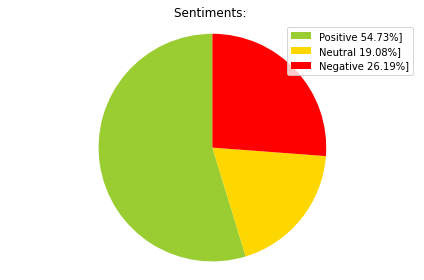

                                           sentences emotions
0  The Rock is destined to be the 21st Century's ...      Sad
1  The gorgeously elaborate continuation of  The ...     Fear
2                   Effective but too-tepid biopic\n  Unknown
3  If you sometimes like to go to the movies to h...    Happy
4  Emerges as something rare, an issue movie that...      Sad


In [25]:
start()